### Worked with Marc Suda

### Linear Regression

In this homework we will walk through how to do linear regression from scratch using numpy.

**Due 3/7** 
#### Part 1
The first thing we need to do is implement the standard error measures used in regression.  You can find the definitions of _Mean Absolute Error_ (MAE) and _Root Mean Squared Error_ (RMSE) [here](https://www.dataquest.io/blog/understanding-regression-error-metrics/).  The definition of the Coefficient of Determination (R2) can be found [here](https://en.wikipedia.org/wiki/Coefficient_of_determination).  Implement them in the following cell. 


In [18]:
def MAE(g,y):
    """g is the predicted outcomes and y is the actual outcomes"""
    mae= (np.sum(np.absolute(g-y))) / len(y)
    print(mae)
    return mae
    

def RMSE(g,y):
    """g is the predicted outcomes and y is the actual outcomes"""
    rmse = (np.sum(np.square(np.absolute(g-y)))) / len(y)
    print(np.sqrt(rmse))
    return np.sqrt(rmse)
    
def R2(g,y):
    """g is the predicted outcomes and y is the actual outcomes"""
    yhat = (np.sum(y)) / len(y)
    SStot = np.sum(np.square(g-yhat))
    SSres = np.sum(np.square(y - g))
    R2 = 1 - (SSres / SStot)
    print(R2)
    return R2


### Make some data

Now we'll create some artificial data to practice on.  We're generating the data by adding noise to the usual square root function.  The noise is sampled from a normal distribution.


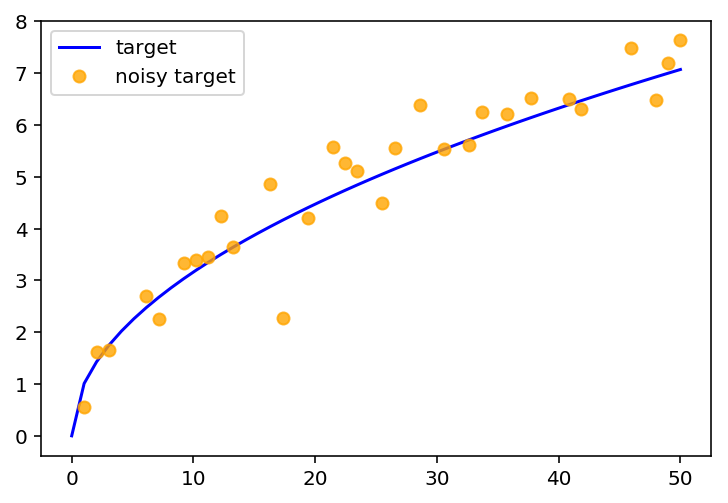

In [2]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0,50,50) ## The domain
N = 30   ## 30 sample points
np.random.seed(22)  # so we get the same random stuff
shuff = np.random.permutation(len(x))
x_pts = sorted(x[shuff][:N])  ## Pick N points at random from the domain

f = np.sqrt   #The target function (no noise yet)

sigma = 1/2
noise = np.random.randn(N)*sigma  ## Noise sampled from the normal distribution with sd=sigma

f_noisy = f(x_pts) + noise   ## Noisy data

plt.plot(x,f(x),label="target",c='blue')
plt.plot(x_pts,f_noisy,'o',label="noisy target",alpha=0.8,c='orange')
plt.legend()
plt.show()

### Fitting and predicting

#### Part 2

Now implement the two functions below.  The `linear_fit` function returns the weight vector `w` found by the linear regression learning algorithm.  Please implement the version that uses the normal equations.  You can find the definition of the normal equations (and their derivation) many places online or in the book.  [Here](https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression/) is an example (they use $\theta$ for what we call $w$).  Another example is given in the PDF I included with this homework.  Note that numpy can compute the pseudo-inverse directly with `np.linalg.pinv(X)`.

In [3]:
def linear_fit(X,y):
    Xt = np.transpose(X)
    XXt = Xt.dot(X)
    XXti = np.linalg.pinv(XXt)
    Xty = Xt.dot(y)
    normaleq = XXti.dot(Xty)
    #np.lingalg.pinv(X).dot(y)
    
    return normaleq

def linear_predict(X,w):
    """Returns a vector of predictions g where g[i] is the prediction for the ith row of X"""
    #for i in X:
    w = np.array(w)
    g = w.dot(np.transpose(X))
    return g
    
    


### Check your work

Now you can check the correctness of the code you wrote.  

The output should look something like this:

![fig](part2.png)

In [4]:
print("hi")

hi


0.5205314372175119
0.6762039590656787
0.8488080437624644


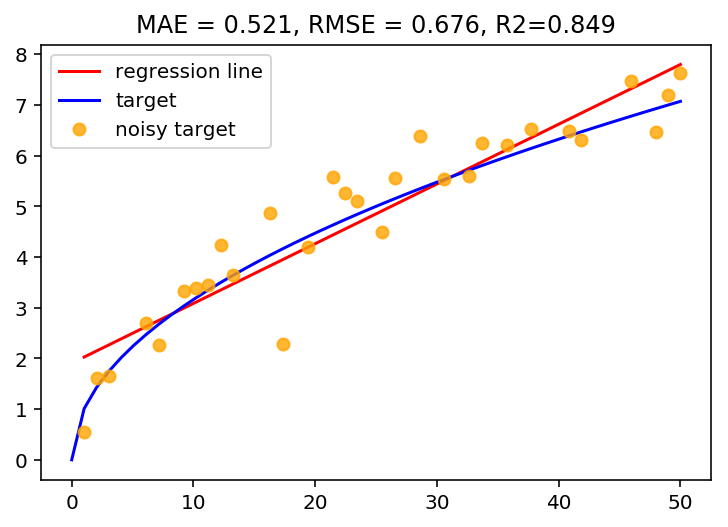

wassup


In [5]:
# Work check

X = np.ones(N*2).reshape(N,2)
X[:,1] = x_pts
y = f_noisy

w = linear_fit(X,y)
g = linear_predict(X,w)


plt.plot(x_pts,g,label="regression line",c='red')
plt.plot(x,f(x),label="target",c='blue')
plt.plot(x_pts,f_noisy,'o',label="noisy target",alpha=0.8,c='orange')
plt.title(f"MAE = {MAE(g,y):0.3}, RMSE = {RMSE(g,y):0.3}, R2={R2(g,y):0.3}")

plt.legend()

plt.show()
print("wassup")

### What's so linear about it?

An important thing to understand about linear regression is that it is linear _in the weights_ not in the data.

Linear regression finds the `w` that minimizes the mean squared error of `g = X.dot(w)` and `y`.  This says nothing about what the columns of `X` are.  They could in fact be _non-linear_ functions of the data.  

### Part 3

Create a new `X` which is like the above `X` but which has a 3rd column.  The 3rd column should be the square root of the first column (`np.sqrt()`).  Then rerun `linear_fit`, `linear_predict`, and your error metrics.  Did the error go down?  What would you expect the weight vector to look like now?

### Compared to the X without the third column, the error went down across the board. I expect the weight vector to look more accurate and have three weights. This accuracy causes the graph to curve similar to the target.

### Work check

You can check your work on Part 3 by running the code below.  The output should look like this:

![img](party3.png)

In [19]:
## Work check
X = np.ones(N*3).reshape(N,3)
x_pts = np.array(x_pts)
X[:,1] = np.sqrt(x_pts)


y = f_noisy


w = linear_fit(X,y)
g = linear_predict(X,w)


plt.plot(x_pts,g,label="regression curve",c='red',marker='o')
plt.plot(x,f(x),label="target",c='blue')
plt.plot(x_pts,f_noisy,'o',label="noisy target",alpha=0.8,c='orange')
plt.legend()
plt.title(f"MAE = {MAE(g,y):0.3}, RMSE = {RMSE(g,y):0.3}, R2={R2(g,y):0.3}")
plt.savefig("party3.png")
plt.show()

ValueError: could not broadcast input array from shape (200) into shape (35)

### Polynomial models

Lets experiment with using polynomial models to fit the data.  

The code below will fit some synthetic data with polynomials of degree 1,4,7,10 and 13.

#### Part 4

a. Which polynomial has the best R2 score (closest to 1)?
The third polynomial had the best score being .70.
2 7
0.27120427313785916
0.3240372590603515
0.7048045465266144


b. Which degree polynomial would you expect to generalize the best to new data points?
According to the data, I expect the polynomial with degree 7 will generalize the best to new data points.

0 1
0.5220382038810902
0.5884945699583383
-inf
1 4
0.49938972759965844
0.5800046924916813
-3.71818669145489
2 7
0.27120427313785916
0.3240372590603515
0.7048045465266144
3 10
0.474758427578759
0.541448256930156
0.2031997506203621
4 13


/ext/anaconda5/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in double_scalars


0.3973044408372405
0.5158373631686566
-1.3311602084365668


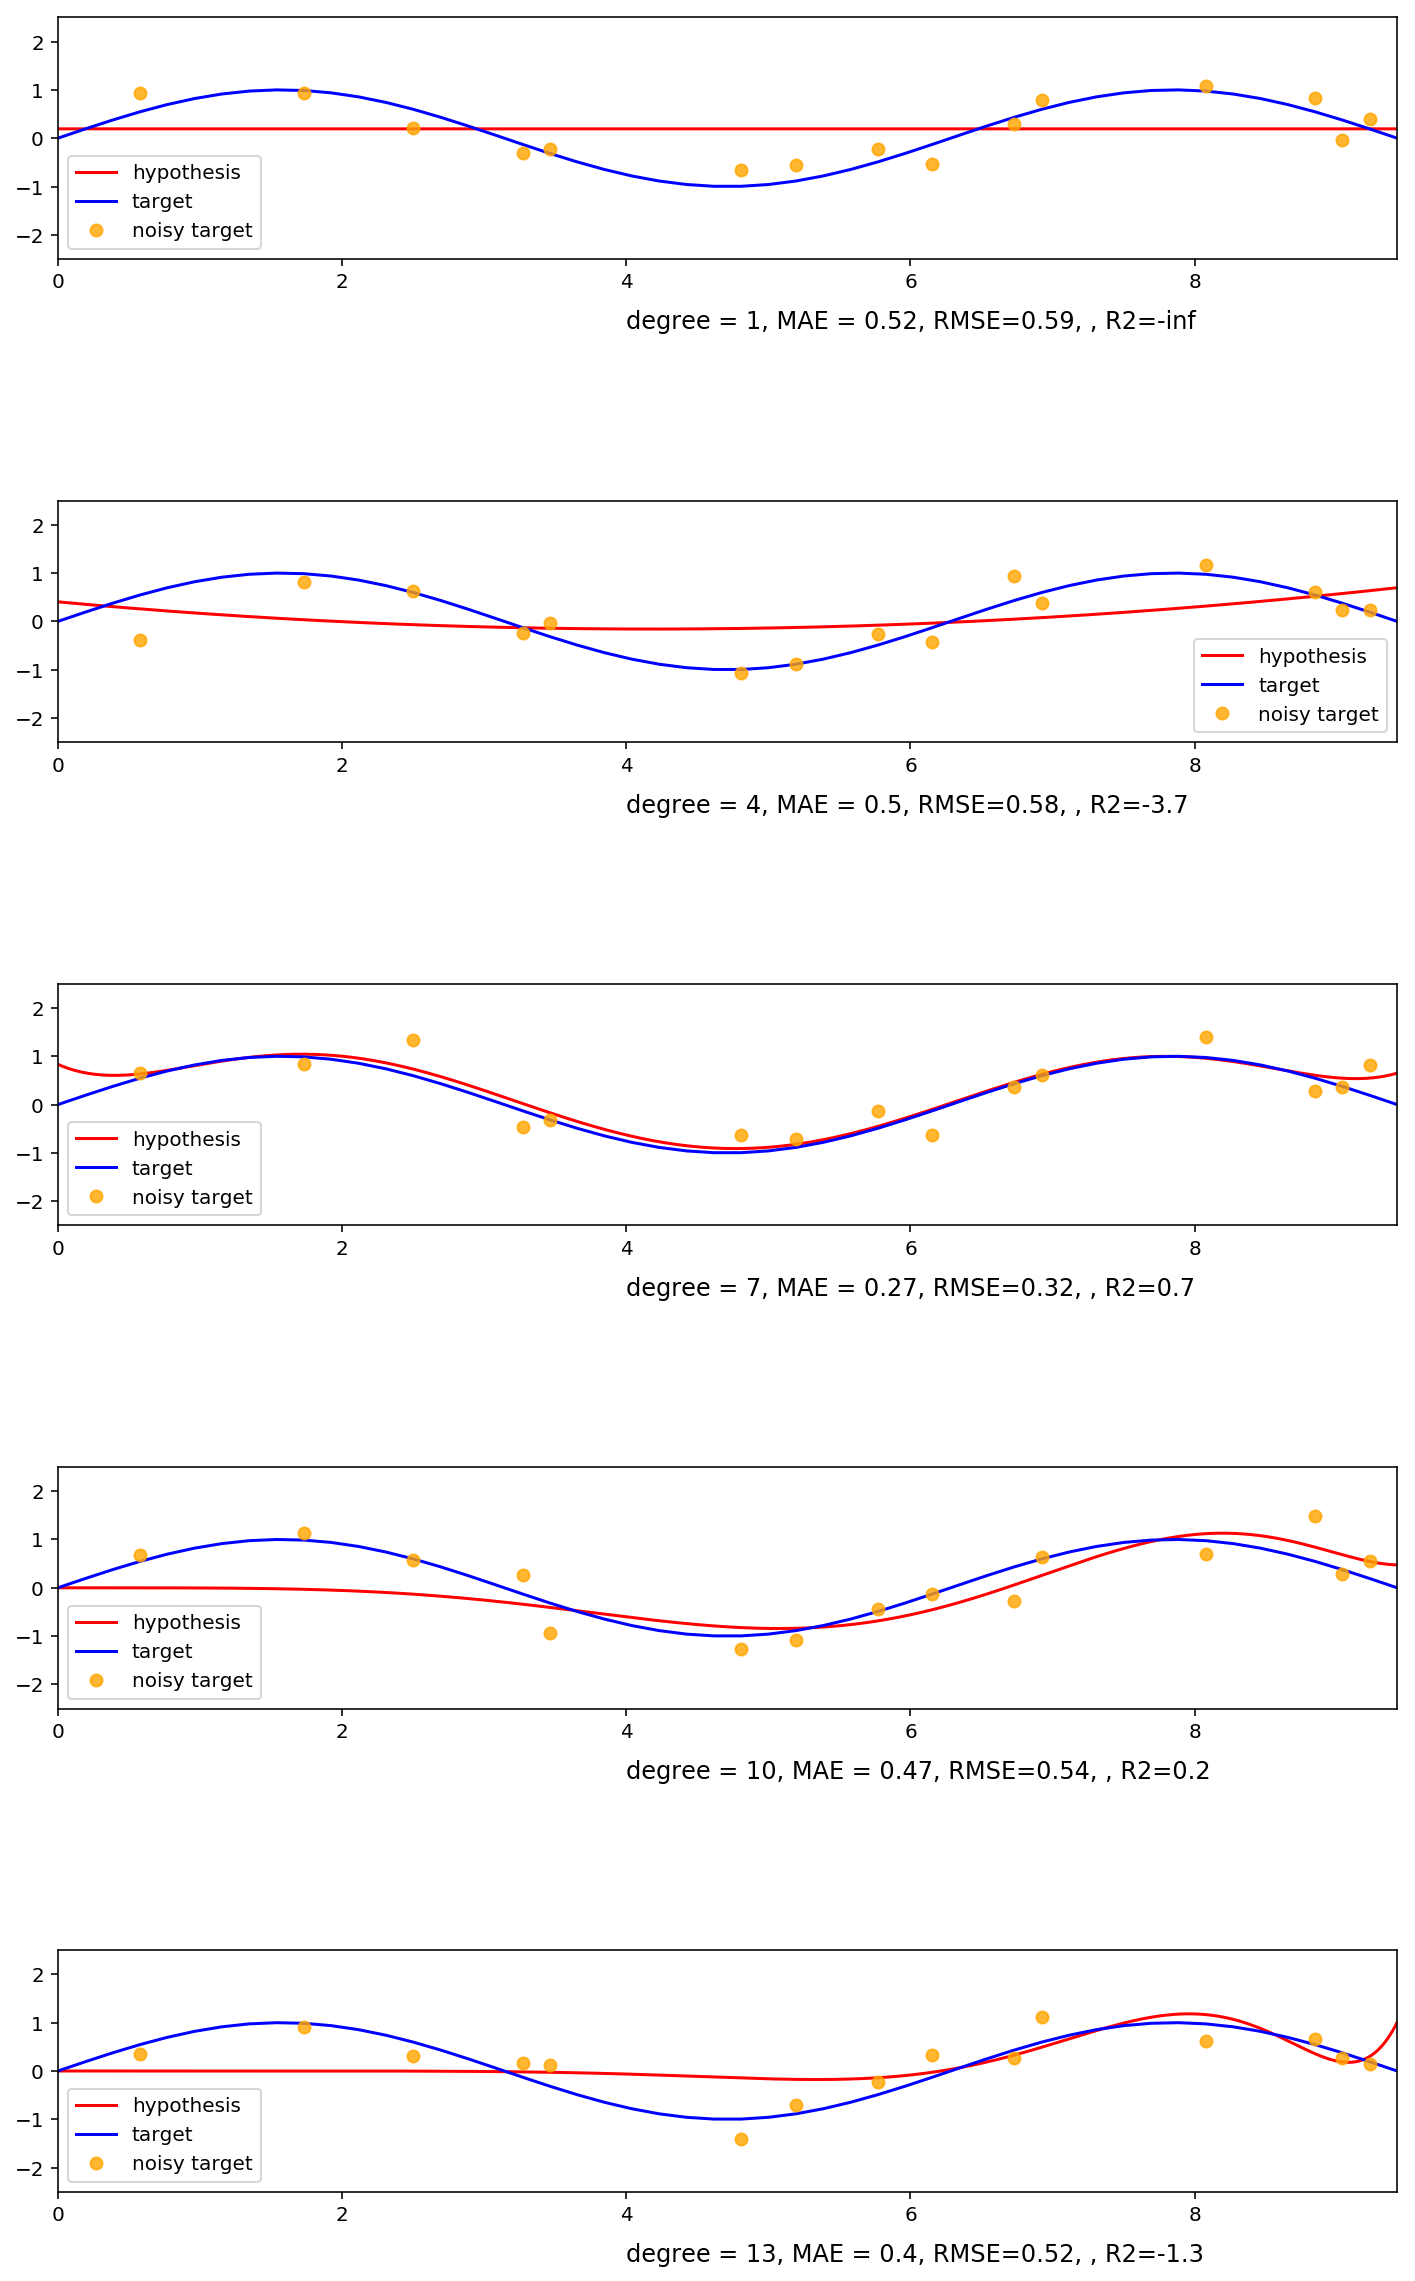

In [7]:
x = np.linspace(0,3*np.pi,50)
N = 15
shuff = np.random.permutation(len(x))
x_pts = np.array(sorted(x[shuff][:N]))

numfigs = 5
fig,axes = plt.subplots(5,1,figsize=(12,4*numfigs))

plt.subplots_adjust(hspace=1)

wt_by_deg = dict()

for i,deg in enumerate(range(1,numfigs*3+1,3)):
    print(i,deg)
    X = np.ones(N*deg).reshape(N,deg)
    for j in range(1,deg):
        X[:,j] = x_pts**j


    noise = np.random.randn(N)
    y = np.sin(x_pts)+ noise/3

    
    w = linear_fit(X,y)
    g = linear_predict(X,w)


    wt_by_deg[deg] = tuple(w)
    
    xx = np.linspace(0,np.pi*3,10000)
    h = np.zeros(len(xx))
    for j in range(deg):
        h += w[j]*xx**j

    axes[i].plot(xx,h,label="hypothesis",c='red')

    axes[i].plot(x,np.sin(x),label="target",c='blue')
    axes[i].plot(x_pts,y,'o',label="noisy target",alpha=0.8,c='orange')
    axes[i].legend()
    ymax = 2.5
    ymin = -2.5
    axes[i].axis([0,3*np.pi,ymin,ymax])

    text = axes[i].text(4,ymin-1.3,f"degree = {deg}, MAE = {MAE(g,y):0.2}, RMSE={RMSE(g,y):0.2}, , R2={R2(g,y):0.2}", size=12, 
    verticalalignment='center')
plt.show()

### Checking out of sample error

Now we examine the polynomials that were learned on the "orange" points shown above, and see how they do on new points (in purple) drawn from the same distribution.

#### Part 5

a.  Which polynomial does the best on the new data?

The third polynomial does the best on the new data, almost matching the curve.


b.  Which polynomial does the worst?

The first polynomial does the worst on the data because it's just a straight line.

c.  Why did the high degree polynomial not do well on new data?

The higher degree polynomial did not do well on the new data because it was a higher degree polynomial than what was required.

0.5317531016550345
0.6296632435787711
-14.98431587595039
0.6012750029400582
0.665454727527886
-1.8169090634131906
0.29274339589817855
0.3254050312744051
0.6393260530856681
0.5355891364460434
0.6497415298549892
0.03229412132393028
0.4565146596661147
0.6246683136249074
-1.4134578278623904


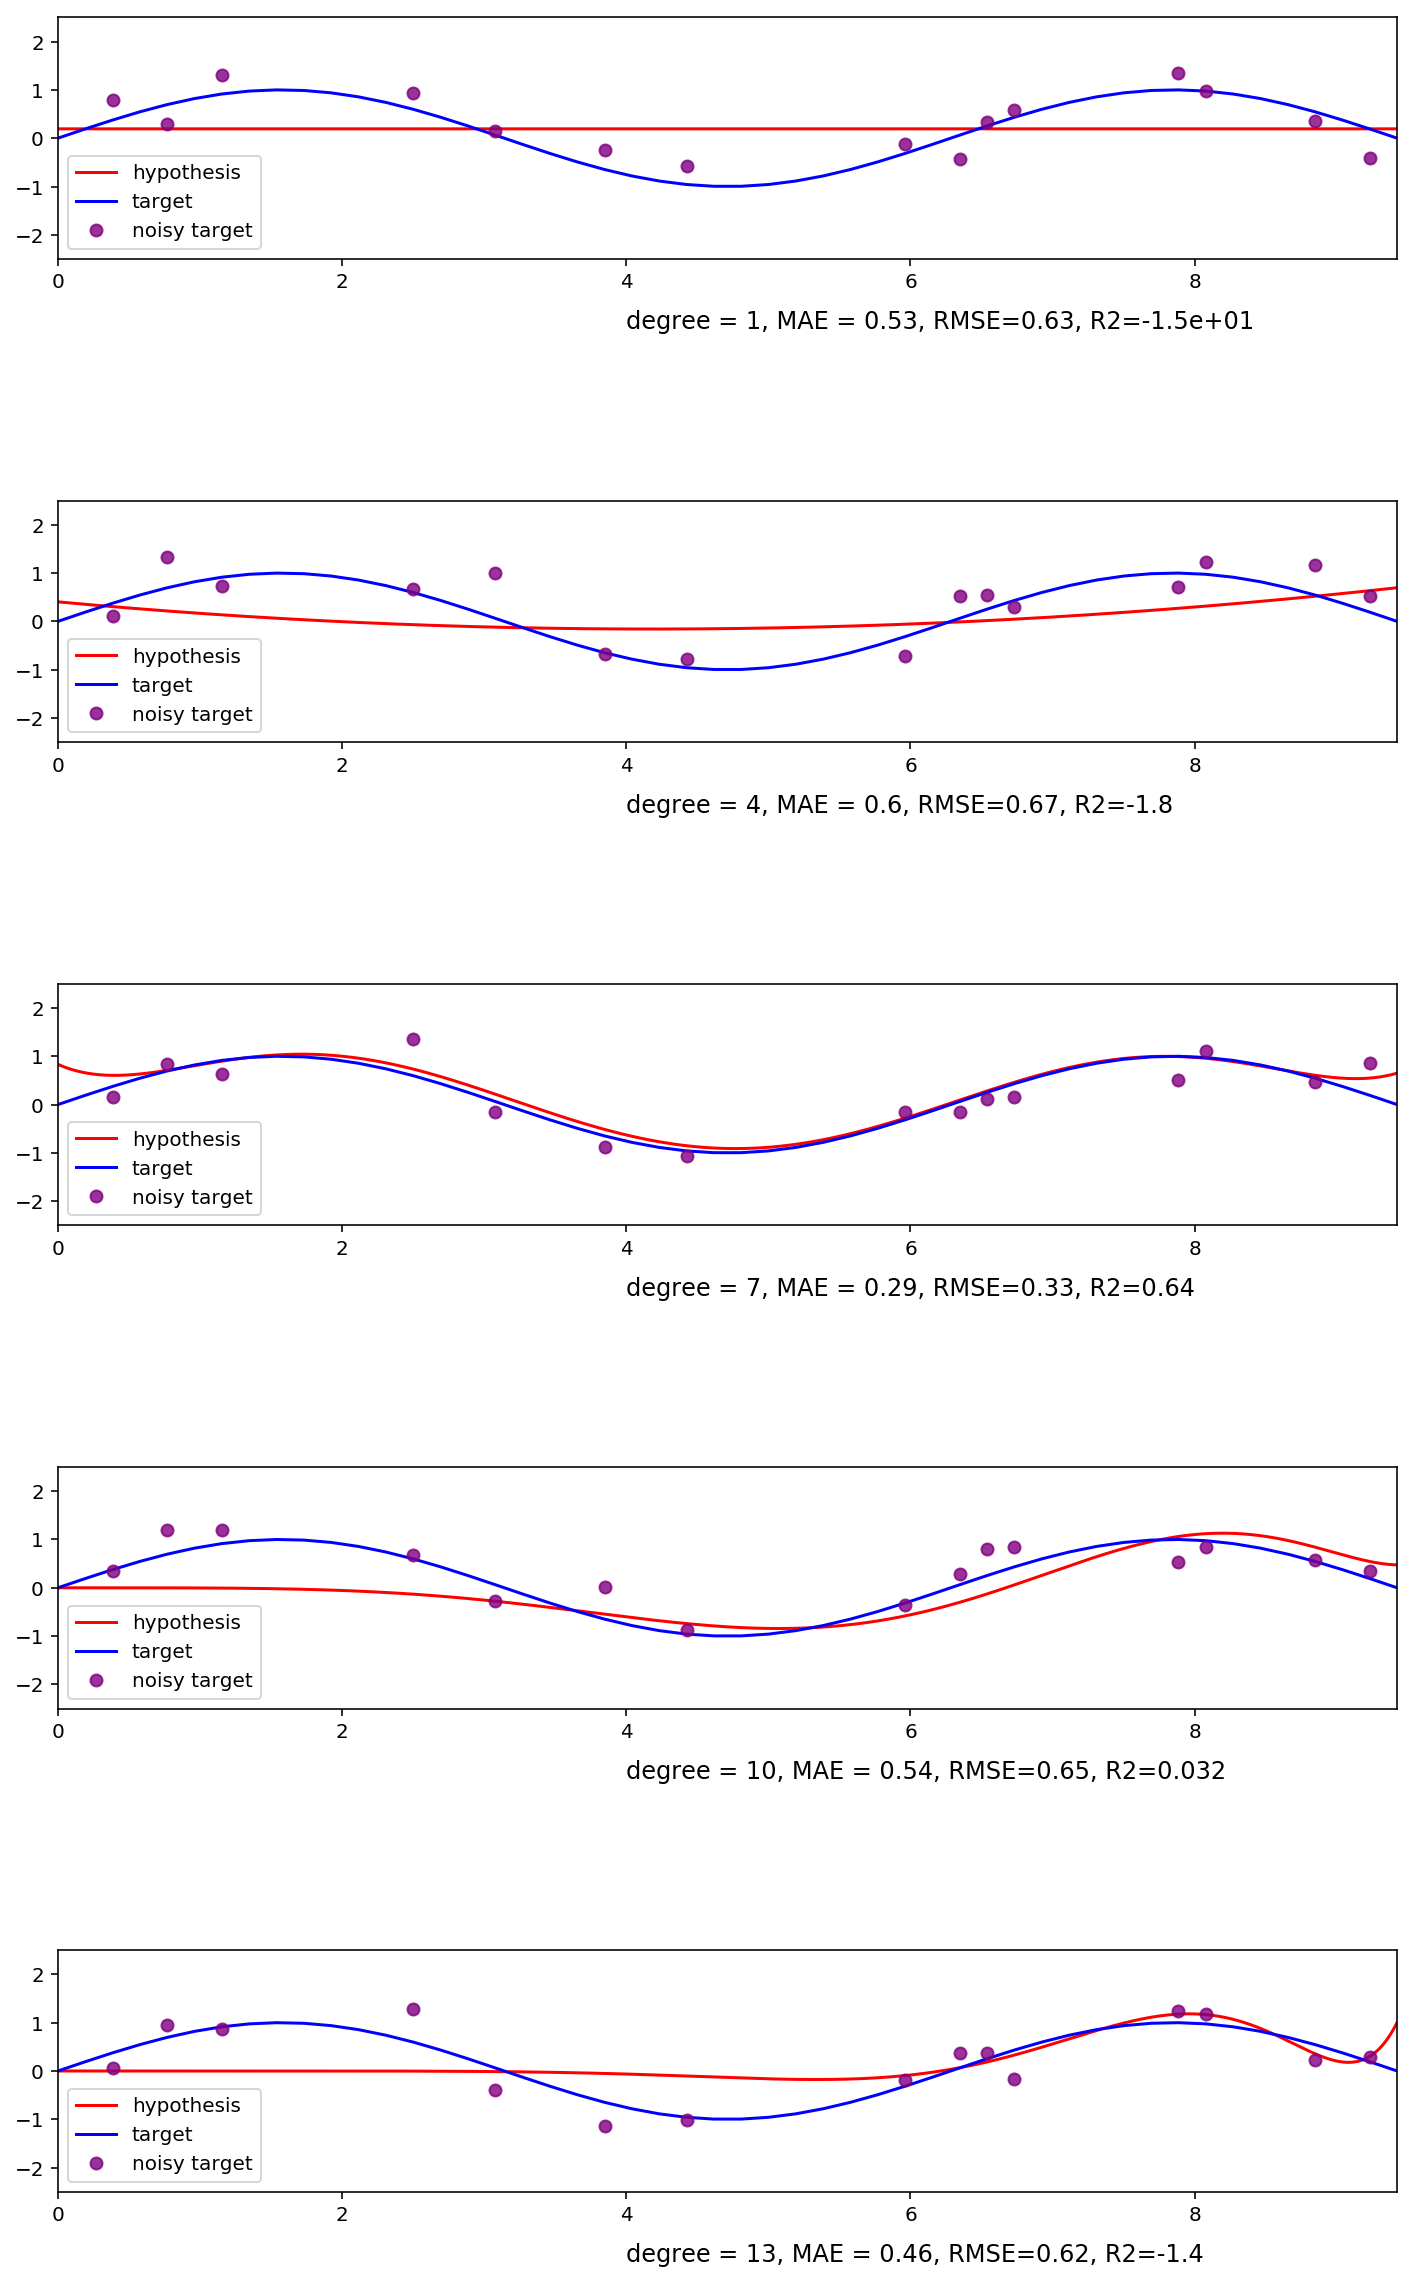

In [8]:
x = np.linspace(0,3*np.pi,50)
N = 15
shuff = np.random.permutation(len(x))
x_pts = np.array(sorted(x[shuff][:N]))

numfigs = 5
fig,axes = plt.subplots(5,1,figsize=(12,4*numfigs))

plt.subplots_adjust(hspace=1)


for i,deg in enumerate(range(1,numfigs*3+1,3)):
    X = np.ones(N*deg).reshape(N,deg)
    for j in range(1,deg):
        X[:,j] = x_pts**j


    noise = np.random.randn(N)
    y = np.sin(x_pts)+ noise/3

    w = wt_by_deg[deg]


    g = linear_predict(X,w)

    xx = np.linspace(0,np.pi*3,10000)
    h = np.zeros(len(xx))
    for j in range(deg):
        h += w[j]*xx**j

    axes[i].plot(xx,h,label="hypothesis",c='red')

    axes[i].plot(x,np.sin(x),label="target",c='blue')
    axes[i].plot(x_pts,y,'o',label="noisy target",alpha=0.8,c='purple')
    axes[i].legend()
    ymax = 2.5
    ymin = -2.5
    axes[i].axis([0,3*np.pi,ymin,ymax])

    text = axes[i].text(4,ymin-1.3,f"degree = {deg}, MAE = {MAE(g,y):0.2}, RMSE={RMSE(g,y):0.2}, R2={R2(g,y):0.2}", size=12, 
    verticalalignment='center')
plt.show()

#### Part 6

Below is part of a function that produces a test/train split on a dataset $\mathcal{D}$.

Fill in the missing parts of the function in the following way using array slicing.

`X_train` should be the first "`cutoff`" many elements in the shuffled matrix `X2`. 

`X_test` should be the remaining elements in `X2`.

`y_train` should be the first "`cutoff`" many elements in the shuffled matrix `y2`. 

`y_test` should be the remaining elements in `y2`. 

In [9]:
def test_train_split(X,y,train_percent=0.8,rand_seed=42):
    np.random.seed(rand_seed)
    cutoff = int(train_percent*X.shape[0])
    shuff = np.random.permutation(X.shape[0])
    X2 = X[shuff]
    y2 = y[shuff]
   ##### Your code
    X_train = X2[:cutoff]
    X_test = X2[cutoff:]
    y_train = y2[:cutoff]
    y_test = y2[cutoff:]
    
    return X_train,X_test,y_train,y_test

#### Part 7

Suppose we have a dataset $\mathcal{D}$ in a regression problem.  

1. What will happen to the in-sample error of linear regression using polynomials of degree $d$ as $d \to \infty$?

The in-sample error will go down as the degree of the polynomial increases. This is because the algorithm can just place a 0 in front of each unnecessary variable. However, in our case it seems that when the degree is too high, the in-sample error will increase.

2. What will happen to the out-of-sample error of linear regression as $d$ increases?

While degree increases, the out-of-sample error will INCREASE because the algorithm has to process more data, unless it hits the target degree. It increases exponentially when the degree is too high in our case.

You can use the output of the code below to help you form your answer.

0.6218540070954657
0.730360917762654
0.6214649331055463
0.7337785485191153
0.542506883039187
0.6756051690031266
0.5319807659172222
0.6774401367087308
0.5318618358444702
0.6693039916883327
0.3080865354114901
2.53298676931631
0.25380898067532537
0.5766066785249965
0.12077479320076402
7.328107882955929
0.18636691258536428
12.672969009598972
0.41328969052696257
22.703440118696815
0.4558005539048699
14.99168550238257
0.48570289901184316
27.245188197602843
0.5087399329733804
33.90712375647121
0.5251325132400783
42.42735063406245
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.52620821281953

0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.458956568272

0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.458956568272

0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.63872064400

0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.4633587778954


13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.852883589

0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911

0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.63872064400

0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.4633587778954

0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.4978057581332

0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.4978057581332

0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.64073652064

0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.08061284384

0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.64073652064

0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.63872064400

0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423


0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.1465141187

0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975

0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423

0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.4978057581332

0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.458956568272

0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.4978057581332


1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.65591374046

0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.166993898134

0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.64073652064

0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.458956568272

0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.63872064400

0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.526208212819

0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.166993898134

0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.134326631131

0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.458956568272

0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.4763580124821

0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.526208212819

0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.458956568272

0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768
0.6407365206429821
0.7262539068165337
0.6387206440027101
0.726135462027679
0.49780575813326916
0.659333971009769
0.47635801248218507
0.6559137404630111
0.4589565682727878
0.6048781626742651
0.2911158915423523
1.6981140904663057
0.1669938981344534
0.29134034084760774
0.0806128438423936
3.121315074436345
0.13432663113175922
4.367701929684348
0.46335877789543506
8.481216806539658
0.47128800975

0.46335877789543506
8.481216806539658
0.47128800975721674
3.4615662916129097
0.5106239911383285
9.85288358907902
0.5262082128195339
11.146514118740665
0.5358108374099179
13.232345781910768


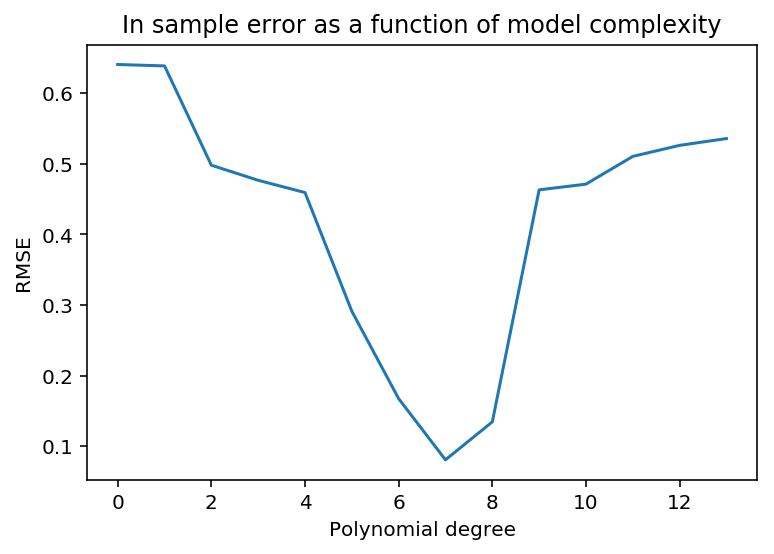

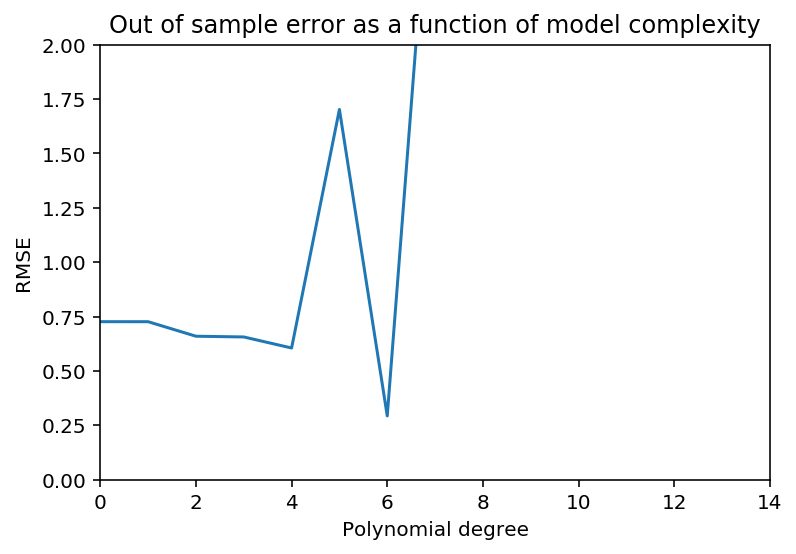

In [10]:
xmin,xmax = 0,4*np.pi
x = np.linspace(xmin,xmax,1000)
D = 14

N = 100
shuff = np.random.permutation(len(x))
x_pts = np.array(sorted(x[shuff][:N]))

K = 200
train_vals = np.zeros(D*K).reshape(K,D)
test_vals = np.zeros(D*K).reshape(K,D)
noise = np.random.randn(N)
y = np.sin(x_pts)+ noise/7

for k in range(K):
    shuff = np.random.permutation(len(x))
    x_pts = np.array(sorted(x[shuff][:N]))
    noise = np.random.randn(N)
    y = np.sin(x_pts)+ noise/7
    for i,deg in enumerate(range(D)):
        X = np.ones(N*deg).reshape(N,deg)
        for j in range(1,deg):
            X[:,j] = x_pts**j
        X_train,X_test,y_train,y_test = test_train_split(X,y,0.13)

        w = linear_fit(X_train,y_train)

        g_train = linear_predict(X_train,w)
        g_test = linear_predict(X_test,w)

        r_train = RMSE(g_train,y_train)
        r_test = RMSE(g_test,y_test)
        train_vals[k][i] = r_train
        test_vals[k][i] = r_test

tr_vals = np.mean(train_vals,axis=0)
te_vals = np.mean(test_vals,axis=0)

plt.plot(range(D),tr_vals)
plt.title("In sample error as a function of model complexity")
plt.xlabel("Polynomial degree")
plt.ylabel("RMSE")
plt.show()
plt.title("Out of sample error as a function of model complexity")
plt.plot(range(D),te_vals)
plt.xlabel("Polynomial degree")
plt.ylabel("RMSE")

plt.axis([0,D,0,2])
plt.show()

#### Part 8

In your answer to part 7 you hopefully observed that training error should strictly decrease as the degree of the hypothesis polynomials increases.  That is because any high degree polynomial can "simulate" a lower degree polynomial by making it's high order coefficients zero.  Thus nothing is lost and something might be gained by increasing the degree.  

But the code below shows that in-sample error actually starts to increase on our dataset for polynomials of very high degree.  Why do you think this happens?

The cause might be because there is so much data that the algorithm is making numerical errors.


0.6429610161710642
0.6762629292611685
0.599172910115193
0.6682678705892376
0.5816461920264246
0.6370053152976578
0.5474081511235119
0.7298278271491209
0.5285710704083144
0.5618525532294985
0.137403065530772
1.3950715379208154
0.10316845260727953
0.706237423388947
0.026918564641836444
1.8693184808740395
0.03054247340858201
1.5072244425003618
0.23959578795507663
8.622186143742416
0.2256170107617116
5.317510950436221
0.17829290205747605
5.3611377882049585
0.4542069835408482
27.676760120873862
0.4935319306232533
36.71975443985336
0.5003061035986367
44.74701826263568
0.5169680542338457
47.82805089039339
0.5184653398426542
42.35261413025072
0.50905897902849
26.45507959213749
0.49722819462521983
3.7076761837670613
0.4869477023478115
47.46281362845573
0.4791455731518776
117.75729071805087
0.47354443026139836
228.26835054355942
0.46960517119043244
402.6228125819117
0.5213233899410512
154.87803063322156
0.5226699945440604
213.54129030625253
0.52383763607015
295.3025335948239
0.5248502506859168
4

36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835


36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.39454683

0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.436131944805

0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572

0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853

0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.2432402767200

0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.430898132858

0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.2432402767200

0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.064610618067

0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853

0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819

0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.2432402767200

0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.560384776


0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770

0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848

0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.436131944805

0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848

0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.2432402767200

0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.430898132858

0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572

0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810

0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817

0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.407746575164

0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848

0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.372171180048

0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.4329486163517

0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.4348570032

0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.407746575164

0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379


0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770

0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817

0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.407746575164

0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.4258032916953

0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846

0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.436131944805

0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.560384776

0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.4348570032

0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.407746575164

0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810

0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379

0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846

0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101


0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.56038477


13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.00171732178

0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.430898132858

0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.4258032916953

0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945

0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.392238839

0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379

0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998

0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.112187876248

0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945

0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945

7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.95824927

8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.87835024752

0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101

0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802

0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802

0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.064610618067

0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.407746575164

0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.560384776

0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.560384776

0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853

0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.4348570032

0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.4348570032

0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848

0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.2432402767200

0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.112187876248

0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358

0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572

0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174

0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.4258032916953

0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.41626877

0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.430898132858

0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.4258032916953

0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.430898132858

8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.87835024752


29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732


3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464

0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101

0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.560384776

0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.43613194480520767
53.55063106087144
0.5642913998

0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.43485700320549486
24.42015823530068
0.4352256810782976
29.763186152385792
0.4355592817458514
36.23919770037909
0.4358605931211431
44.077481303718635
0.436131944805

0.43613194480520767
53.55063106087144
0.5642913998382211
0.6391844819239951
0.5603847768694228
0.6366833883472414
0.41564802338843215
0.5375414998909117
0.412163775078422
0.548845853388115
0.4077465751645869
0.507952653248834
0.243240276720025
0.8814894205464212
0.13819295693848466
0.22606430922700949
0.06461061806741451
1.1656987921337794
0.11218787624803825
1.603991962014758
0.3721711800483146
3.1369458277557807
0.3223947358120729
1.4543111177510903
0.39223883908809787
3.5633687931302895
0.40398174933543396
3.958249275206095
0.4162687750618933
4.58960167445925
0.4243664945863612
5.520591196929706
0.42964612572538974
6.706094139043066
0.43258855379201244
7.878350247528266
0.43312748846047416
8.245255351825724
0.43089813285864054
6.001717321786863
0.42580329169532516
2.760398077115745
0.43233045501101414
8.955040149553831
0.43294861635177134
10.967595521722437
0.43350189107789716
13.415610732168672
0.43399993853708324
16.394546835017966
0.4344498388251109
20.01768992777802
0.4348570032

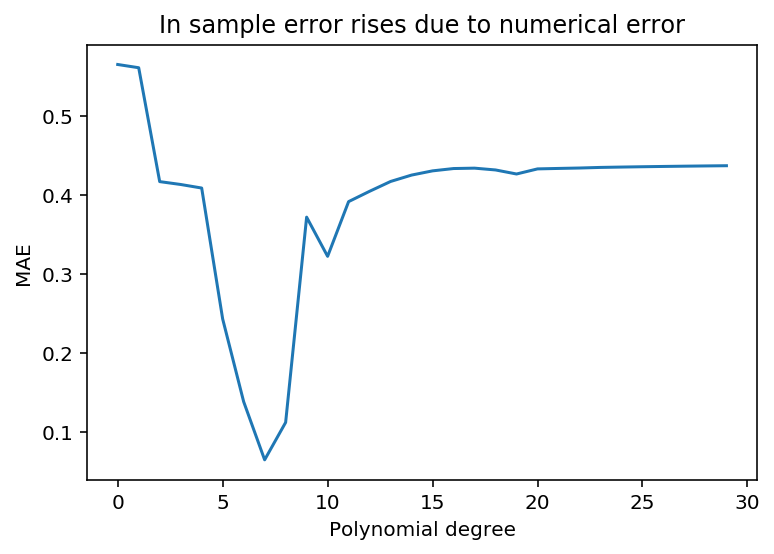

In [11]:
## Numerical error

xmin,xmax = 0,4*np.pi
x = np.linspace(xmin,xmax,1000)
D = 30

N = 100
shuff = np.random.permutation(len(x))
x_pts = np.array(sorted(x[shuff][:N]))

K = 200
train_vals = np.zeros(D*K).reshape(K,D)
test_vals = np.zeros(D*K).reshape(K,D)
noise = np.random.randn(N)
y = np.sin(x_pts)+ noise/7

for k in range(K):
    shuff = np.random.permutation(len(x))
    x_pts = np.array(sorted(x[shuff][:N]))
    noise = np.random.randn(N)
    y = np.sin(x_pts)+ noise/7
    for i,deg in enumerate(range(D)):
        X = np.ones(N*deg).reshape(N,deg)
        for j in range(1,deg):
            X[:,j] = x_pts**j
        X_train,X_test,y_train,y_test = test_train_split(X,y,0.13)

        w = linear_fit(X_train,y_train)

        g_train = linear_predict(X_train,w)
        g_test = linear_predict(X_test,w)

        r_train = MAE(g_train,y_train)
        r_test = MAE(g_test,y_test)
        train_vals[k][i] = r_train
        test_vals[k][i] = r_test

tr_vals = np.mean(train_vals,axis=0)
te_vals = np.mean(test_vals,axis=0)

plt.plot(range(D),tr_vals)
plt.title("In sample error rises due to numerical error")
plt.xlabel("Polynomial degree")
plt.ylabel("MAE")

#plt.axis([0,D,0,2])
plt.show()



#### Part 9

Adjust the `deg` (degree) variable in the code below such that the hypothesis space best suits the data and target function.  The graphic should be helpful.  Consider whether you want to revise your answer for Part 7 pt 2.


0.06461061806741451
1.1656987921337794
0.9838132324757667
-0.08627919134508666


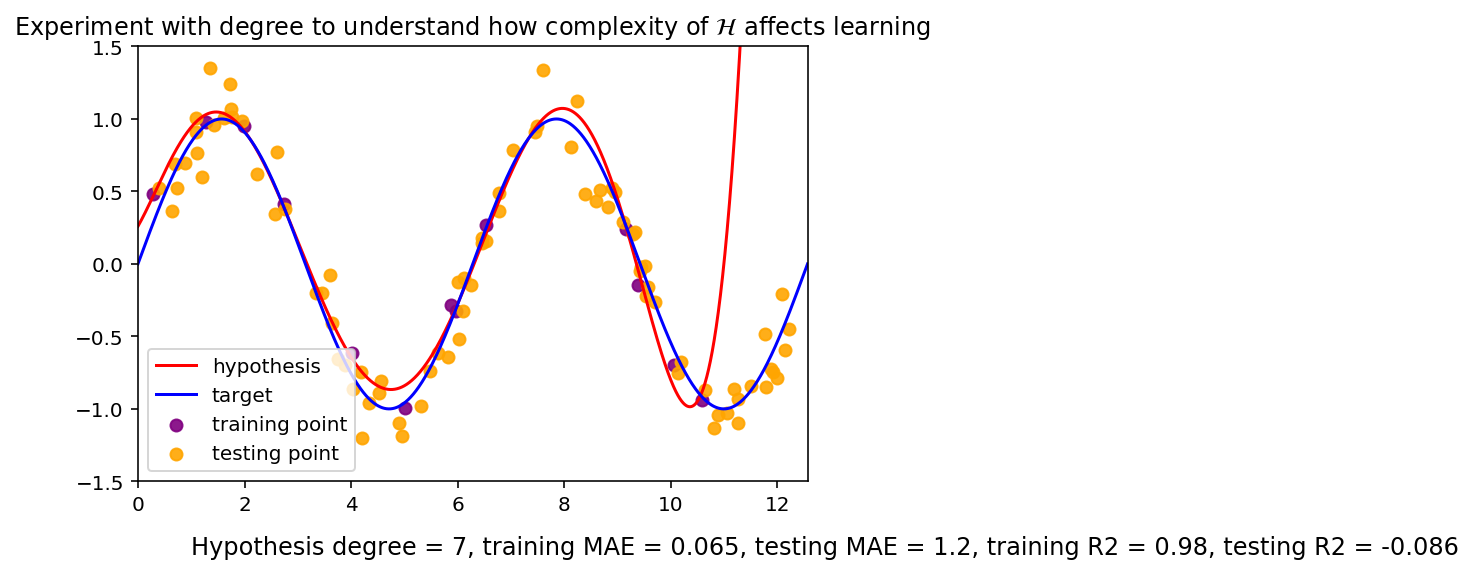

In [12]:


shuff = np.random.permutation(len(x))
x_pts = np.array(sorted(x[shuff][:N]))

deg = 7  ## The degree of the polynomials in the hypothesis space

noise = np.random.randn(N)
y = np.sin(x_pts) + noise/7
yy = np.sin(x)

X = np.ones(N*deg).reshape(N,deg)
for j in range(1,deg):
    X[:,j] = x_pts**j

X_train,X_test,y_train,y_test = test_train_split(X,y,0.13)




w = linear_fit(X_train,y_train)
g_train = linear_predict(X_train,w)
g_test = linear_predict(X_test,w)

xx = np.linspace(0,xmax,10000)
h = np.zeros(len(xx))
for j in range(deg):
    h += w[j]*xx**j

plt.plot(xx,h,label="hypothesis",c='red')

plt.plot(x,yy,label="target",c='blue')
plt.title(r"Experiment with degree to understand how complexity of $\mathcal{H}$ affects learning")
plt.scatter(X_train[:,1],y_train,c='purple',label="training point",alpha=0.9)
plt.scatter(X_test[:,1],y_test,c='orange',label="testing point",alpha=0.9)
plt.legend()

ymax = 1.5
ymin = -1.5#np.min(X[:,1])*1.15
plt.axis([xmin,xmax,ymin,ymax])
plt.text((xmax-xmin)//8,ymin*1.3,f"Hypothesis degree = {deg}, training MAE = {MAE(g_train,y_train):0.2}, testing MAE = {MAE(g_test,y_test):0.2}, training R2 = {R2(g_train,y_train):0.2}, testing R2 = {R2(g_test,y_test):0.2}", size=12, 
    verticalalignment='center')
plt.show()

### Learning Curves

In the above exercises we fixed a dataset and explored what happens as we vary the complexity of the hypothesis class $\mathcal{H}$.  

Now we will fix a hypothesis class $\mathcal{H}$ and explore what happens to training and testing error as the number of datapoints increases. This is known as a [Learning Curve](https://www.coursera.org/lecture/machine-learning/learning-curves-Kont7).



48.91587069790951
878.1414325220852
48.91587069790951
733.6391094629374
37.333950927165084
315.4001606538805
37.333950927165084
452.673510653963
83.01818913055881
456.32504473563
83.01818913055881
401.99229660605556
77.87909017020279
459.3847435179886
77.87909017020279
495.72010969016264
69.8641813623515
556.6423429699868
69.8641813623515
924.7073294707388
73.26115720123661
928.9992427334668
73.26115720123661
859.3322547441877
74.86862393333907
871.6541928719467
74.86862393333907
916.1679500834263
147.64386824225713
1007.6215996693527
147.64386824225713
1006.8725328842022
165.1047504143124
1151.2691571167761
165.1047504143124
1082.724513326668
172.62597358648037
1165.068996176468
172.62597358648037
1090.4633489893085
164.8476228782908
1100.5214733355824
164.8476228782908
1064.1779968405044
158.09233950082034
1084.6073738308542
158.09233950082034
1027.0681392382378
206.73022934030163
1280.4249423331266
206.73022934030163
1258.6467939718914
249.4456146331942
1076.084973307466
249.4456146

625.7980672765628
610.9080705859519
625.7980672765628
606.0441869021655
615.2656429635351
604.0193256785954
615.2656429635351
592.9395246973119
604.9052786645753
628.1363076034743
604.9052786645753
617.6792668483166
602.4670831389263
610.8455692061832
602.4670831389263
601.0092664960157
604.3587176122564
612.7166213935709
604.3587176122564
602.6982064509439
596.1151878831296
600.2316599724032
596.1151878831296
593.247845596457
587.9160500491316
593.0093424662546
587.9160500491316
583.4577839005074
595.770417106491
570.3701439748589
595.770417106491
568.2537263043283
609.9509674614002
579.5007493062054
609.9509674614002
586.2136764089572
606.9844353680628
610.1087587856641
606.9844353680628
614.7246045243986
609.9288662842927
608.1220526427571
609.9288662842927
628.5328736355068
604.9538674348341
624.1267746764703
604.9538674348341
615.3311745368674
607.2499343298932
625.187823500421
607.2499343298932
617.4429837944618
598.6050051777156
642.9724517961836
598.6050051777156
636.6078712685

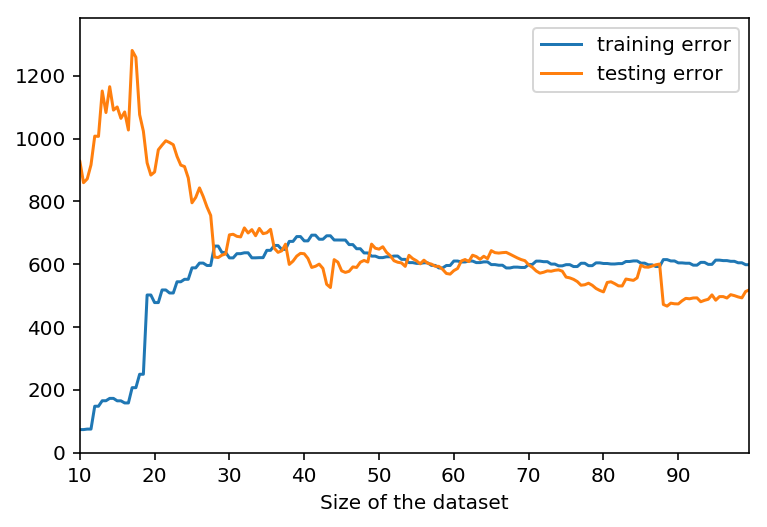

In [13]:
x = np.linspace(0,17*np.pi,2000)
N = 200
shuff = np.random.permutation(len(x))
x_pts = np.array(sorted(x[shuff][:N]))

deg =6
X = np.ones(N*deg).reshape(N,deg)
for j in range(1,deg):
    X[:,j] = x_pts**j

shuff = np.random.permutation(N)
X = X[shuff]


noise = np.random.randn(N)
y = np.sin(x_pts)*x_pts**2 + noise
y2 = y[shuff]

values = []
for m in range(10,N):
    X_train = X[:int(m*0.5)]
    X_test = X[int(m*0.5):m]

    y_train = y2[:int(m*0.5)]
    y_test = y2[int(m*0.5):m]



    w = linear_fit(X_train,y_train)
    

    g_train = linear_predict(X_train,w)
    g_test = linear_predict(X_test,w)
    
    r_train = MAE(g_train,y_train)
    r_test = MAE(g_test,y_test)
    values.append([m,r_train,r_test])
    
values = np.array(values)
plt.plot(values[:,0]/2,values[:,1],label="training error")
plt.plot(values[:,0]/2,values[:,2],label="testing error")
xmin = np.min(values[:,0])
xmax = np.max(values[:,0])
ymin = 0
ymax = np.max(values[:,1])*2
plt.axis([xmin,xmax/2,ymin,ymax])
plt.xlabel("Size of the dataset")
plt.legend()
plt.show()


### That looks a bit rough...

The shape of the above curves depend on random choices and may not look quite like the ideal.

The picture should be approximately this:

![learning_curve](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTGXPTiYYCNENLz2OgbP37y6ZwtOiSsSzoCyoT2DeYMzjMkM7ou8Q)

In the code below we average the above experiment over $K=200$ runs and get something that looks more appropriate.



81.96101211089326
1349.5249059840696
81.96101211089326
1263.122275156488
598.3045121986967
932.672299394139
598.3045121986967
879.7898156438324
554.0973793931806
897.6562931705688
554.0973793931806
910.4736957278908
566.968271086827
934.4924226043792
566.968271086827
1075.4322308088567
554.9712865764742
1078.8402155786978
554.9712865764742
1212.108368025772
805.5449335860445
1128.608682701745
805.5449335860445
1137.7043645040897
792.9986345885284
1123.7402403175197
792.9986345885284
1103.8690870319083
766.902106342416
1156.733710438742
766.902106342416
1112.0482227018626
742.2803066743082
1221.7255610412421
742.2803066743082
1249.376088057184
727.7094854867397
1370.1692909833832
727.7094854867397
1323.9664889262053
759.8976066381985
1190.941032557158
759.8976066381985
1162.5681012470482
742.7076287139553
1145.0450570046653
742.7076287139553
1124.3971394095277
847.425153942934
1169.406001964873
847.425153942934
1149.1714611973248
853.8817175661942
1094.3817541146063
853.8817175661942
10

925.2281377042174
671.4567054808165
916.5057139648956
671.5428553544639
916.5057139648956
667.3690687604303
908.5101640216276
665.5337194663559
908.5101640216276
678.9140370364792
900.7829711012541
677.9353884160992
900.7829711012541
672.7845493531737
892.7408704709381
689.817665944958
892.7408704709381
683.9317097604907
884.882044728706
696.3500930298653
884.882044728706
690.3340977225607
904.6732023225456
665.5451267817815
904.6732023225456
660.2456625151472
897.0018193995971
662.0250005391782
897.0018193995971
716.0597120414199
889.537647096144
750.348766863908
889.537647096144
747.2286686240508
883.2919774437179
745.6400137589079
883.2919774437179
740.7142236168731
878.8409428218756
739.2345535268684
878.8409428218756
747.2431749467331
872.0774824569224
747.2118534668336
872.0774824569224
743.0447552988904
866.5300259619839
741.6313206327019
866.5300259619839
736.0932712463737
861.5957789124709
796.2013193645771
861.5957789124709
790.286825984128
855.7520809700985
788.6479671408878

872.7436392915962
712.0526029103788
854.901721873917
669.1470152884206
854.901721873917
651.3740407126666
834.2144293110665
640.971597864488
834.2144293110665
624.1696522603236
825.3322205225136
666.7764820156735
825.3322205225136
726.180371605217
859.348455884888
657.998379309646
859.348455884888
648.0523818168522
841.4843136347628
643.3301470432133
841.4843136347628
641.6604809309667
825.1139621817063
697.7058497966184
825.1139621817063
682.9027060932813
806.2398155436596
722.7710107601321
806.2398155436596
733.5576874785744
794.525572016253
783.1852033888349
794.525572016253
785.2188218642766
781.8101538703506
778.8512752121093
781.8101538703506
763.2977929037813
766.9401802704889
771.5508254005124
766.9401802704889
818.4983354929021
753.668077938096
815.0641253874941
753.668077938096
799.9549893280057
769.8805333758387
768.6821699584722
769.8805333758387
754.9063336260804
757.6299249969309
753.4867960024704
757.6299249969309
740.4966731860666
744.7998626254569
779.7169447634185
744


813.5418153938581
907.3204395152128
808.6515488196974
907.3940183154842
808.6515488196974
908.7983349062803
804.2272011374466
909.1446162381554
804.2272011374466
908.0047663487009
800.6847860414155
904.3841606254573
800.6847860414155
904.6741060154432
796.5103021674294
903.7118371609555
796.5103021674294
908.3282997495596
791.8649951750001
909.5364818175035
791.8649951750001
905.3081553793522
788.317121722009
906.1666569347947
788.317121722009
909.097613425957
801.6104148308949
885.8467498520383
801.6104148308949
888.1953161688931
833.6330526517354
885.667023767104
833.6330526517354
910.1731485319133
829.0817770259602
939.8737762661084
829.0817770259602
950.6410635230952
824.4771267712125
950.4566931246753
824.4771267712125
945.3179300037302
825.7983612453833
949.3284116457829
825.7983612453833
944.1772344488163
821.2998256218892
963.8902124536778
821.2998256218892
958.8301945054847
817.0137208274273
958.7416586167558
817.0137208274273
953.6522513845819
822.3393968489885
945.453228103

837.7961206388535
775.4381365292161
837.7961206388535
846.8583290509894
840.0844269971371
816.4104311979432
840.0844269971371
808.4122355819134
829.3603049154772
816.219159197093
829.3603049154772
817.0413544014332
822.0153446764891
800.8961647558659
822.0153446764891
791.5366573220666
811.9920251349567
792.4260531401713
811.9920251349567
785.6551199494403
812.2455359718322
834.458699294829
812.2455359718322
829.5091373934057
803.3361250020051
828.8609811416173
803.3361250020051
821.4182345412879
831.1178921787579
781.3960728217726
831.1178921787579
801.8776822117488
822.4320841565886
805.2337346164004
822.4320841565886
796.4385476736009
814.9591859796562
798.428751928943
814.9591859796562
792.4901531900717
808.7229937997239
791.507337922444
808.7229937997239
784.4789515508866
803.7948766530182
781.610773005854
803.7948766530182
774.8494116202068
797.6101326440771
769.2909281774837
797.6101326440771
785.3963450733553
789.596505078522
808.5575089376297
789.596505078522
802.7190265112201

946.8983269630879
948.3164057482642
946.8983269630879
938.0734545282304
935.860815330799
944.683000909857
935.860815330799
934.7200044215537
955.5841218488282
905.2458544589152
955.5841218488282
947.4415416389488
945.0184231690012
949.2326905639228
945.0184231690012
940.0967601228756
952.3919486311571
938.8737645946262
952.3919486311571
936.6216516908629
958.7867014086703
900.9625234535345
958.7867014086703
891.6427392968764
948.7877382252435
892.2569361073469
948.7877382252435
918.6610687324177
954.3289846831949
889.3613536546669
954.3289846831949
899.0759796371553
944.7638811257292
899.750047944726
944.7638811257292
902.6102652448368
935.6785640804119
916.1735645037214
935.6785640804119
908.7199801872728
928.0309635224515
908.68086418603
928.0309635224515
940.5166466860206
928.427216635197
920.7761609483393
928.427216635197
914.2007558253401
919.8029168887562
955.1165469855425
919.8029168887562
950.2776415870965
912.1884508775591
951.0922920746001
912.1884508775591
951.3431455994971


916.7374926498559
832.3784908396299
916.7374926498559
827.4922277221472
911.440214944222
828.2003562222134
911.440214944222
823.7286660881434
906.5647338797237
821.523916709925
906.5647338797237
862.060434766219
901.5803638837909
862.0584214290296
901.5803638837909
857.9956026885762
903.0157197568748
851.5572104604277
903.0157197568748
846.9582330394664
918.5653780707812
826.3404277217419
918.5653780707812
823.5700179102272
913.795588882543
821.9767026025379
913.795588882543
817.5377642585918
908.9846993199787
836.3933053001585
908.9846993199787
832.2351476958994
905.2504460683714
831.2867443178294
905.2504460683714
832.7370224962731
902.9081299656418
825.242178145903
902.9081299656418
832.7615334846942
898.3088955624646
833.6439120778676
898.3088955624646
836.9202267258556
893.6358242207758
848.4997720757204
893.6358242207758
844.3577196025673
889.3353417132837
843.3130664033723
889.3353417132837
838.9586563625681
899.015943959514
823.5546600142824
899.015943959514
819.6177631929144
8

950.5718113305242
733.5179735650041
940.1469938203244
738.1084719119276
940.1469938203244
730.4589207556907
930.1447769175288
730.1445180936215
930.1447769175288
723.7806240500652
920.244279538858
777.7030079237782
920.244279538858
801.4979105089893
910.782004977118
851.7181899197661
910.782004977118
845.35602014114
901.4717631034143
846.896349832955
901.4717631034143
838.4423810192695
900.5804632954467
846.0945910089667
900.5804632954467
838.0408562902234
892.1441918556349
842.057613835575
892.1441918556349
866.8062706533874
886.1827997262062
859.7524460021588
886.1827997262062
851.9837046790024
877.7945993836947
853.7686628100299
877.7945993836947
846.3805776746373
869.8560182704784
845.6328180012092
869.8560182704784
838.286826317457
870.0983873978605
832.4576338945719
870.0983873978605
825.1209440920283
890.9540056958343
806.1650879080415
890.9540056958343
799.1893700494904
883.104085608994
799.8062964438556
883.104085608994
793.1502723105657
885.6480927918284
818.8548361001674
885

822.1582957836232
920.9024076654948
818.0773101393082
924.8835769026161
818.0773101393082
920.1934036486164
814.2500060860211
920.0070976157355
814.2500060860211
939.8426809383193
834.4245088185089
919.7741931403233
834.4245088185089
916.0519048468835
850.0017798105557
891.890578777252
850.0017798105557
887.3963936108615
866.4589777598734
870.3383925715042
866.4589777598734
866.0147661385895
863.1055063301033
865.4193603339193
863.1055063301033
861.0051873130135
859.3335809257968
860.6408035642205
859.3335809257968
859.7207632660802
854.9897464242908
862.7048112921306
854.9897464242908
877.5416295807547
71.13241710695846
1561.8079679905559
71.13241710695846
1895.2858426838259
104.61452767825013
3634.7883590954266
104.61452767825013
3409.877850612935
158.1205898340567
1494.7918062056706
158.1205898340567
1423.89738306565
150.2439165489265
1834.7017750057335
150.2439165489265
1733.1347362062609
312.1199594832519
1783.4844940961457
312.1199594832519
1701.8224695509339
307.2606588474382
16


692.9660449072709
995.4924446427668
692.9660449072709
995.0180147361115
688.7339478045369
1016.9529981900779
688.7339478045369
1009.9101487238354
683.9241131096622
1010.4232142674783
683.9241131096622
1016.3692526765649
681.1250276777879
1014.913871377883
681.1250276777879
1013.4769165395537
700.1140290039725
1000.0267417221485
700.1140290039725
993.1139310767484
695.2503887784378
993.703443811748
695.2503887784378
1010.6341659592249
690.9976510287382
1023.2634606204363
690.9976510287382
1016.3295183185734
687.0828495099349
1015.5113200949241
687.0828495099349
1008.7856473871842
682.7277533859673
1008.8857344605133
682.7277533859673
1002.7090069498939
678.2404425881143
1005.3578622794531
678.2404425881143
1014.2095086906857
702.9778210414578
985.5506519195275
702.9778210414578
984.2492608962752
706.1234187481031
985.6211185612358
706.1234187481031
979.8004533784574
701.6978266020642
979.6785207560062
701.6978266020642
1021.0937488917805
697.5371633557536
1022.0270203059807
697.5371633

807.358231401742
713.589305613698
786.282101055671
1246.221390107405
786.282101055671
1215.4920184590285
767.4359899255955
1329.664311107984
767.4359899255955
1289.2424899010402
749.3383930564258
1283.307885006405
749.3383930564258
1246.1440535099118
744.4525270893824
1265.8628309983712
744.4525270893824
1251.0120767299352
723.4757538739309
1256.8657156715465
723.4757538739309
1249.579785519161
736.1063352461733
1320.4372530176925
736.1063352461733
1304.2128661979843
740.972004204942
1427.2381821256824
740.972004204942
1399.4066263630816
734.2704158313768
1361.5042910211778
734.2704158313768
1334.2579479985966
717.9644613899961
1330.8526069377015
717.9644613899961
1308.4036581914643
702.4915684372932
1347.163680783727
702.4915684372932
1318.9613449328342
688.7270830754248
1317.190374613473
688.7270830754248
1294.4010919209898
678.5469540395477
1277.8612471912172
678.5469540395477
1271.9428638525455
665.6712834058395
1269.8982470102535
665.6712834058395
1281.190315786174
688.03157670680

769.1546852560544
866.2000430681809
763.4955994940025
868.04513941333
763.4955994940025
862.1987189517673
758.2603218460227
861.4340186954757
758.2603218460227
855.7876534061014
758.919446750394
884.6828709620473
758.919446750394
878.5733950162705
753.6025869912272
881.2538661202551
753.6025869912272
877.7949195789477
748.3529963906793
882.7536471083405
748.3529963906793
887.0617665299582
744.2506885929305
890.6641888619008
744.2506885929305
884.9535133993485
768.7828209084666
853.8061804405855
768.7828209084666
848.26888858888
763.6497906102603
853.9389636752203
763.6497906102603
849.2895085880679
758.6111020442436
868.7314023837283
758.6111020442436
863.0975283810628
754.2393610617331
856.3823932601993
754.2393610617331
900.4561605233113
749.395838885599
906.4337917145306
749.395838885599
900.7259703975421
746.3226545079746
898.6483886049776
746.3226545079746
893.0586673475476
742.7629456772246
916.5980204959202
742.7629456772246
911.1044919946805
738.2640296017275
911.4520282651391


662.9683852593295
958.0010174698873
660.2847470561172
939.1964914514291
660.2847470561172
1257.273859652779
651.2706324962459
1237.602094253084
651.2706324962459
1213.7850412338928
637.6485243812132
1224.701415083548
637.6485243812132
1204.7077975278135
632.0272516802786
1200.2445175256871
632.0272516802786
1186.253561917115
619.7912268380385
1217.4421757960424
619.7912268380385
1218.3413417192169
745.2713637596158
1125.053877632603
745.2713637596158
1105.6172275313309
731.8564860293337
1107.8652723340115
731.8564860293337
1092.3957899657814
719.1664537746962
1096.068013103643
719.1664537746962
1079.8532980379125
716.31756813268
1080.6254683985126
716.31756813268
1098.7450341662254
705.9557695844105
1108.0915027542924
705.9557695844105
1139.9566876787817
696.1026478551636
1134.2166374294222
696.1026478551636
1167.5724079146999
699.6131880619736
1166.141726084963
699.6131880619736
1159.8539543376007
695.4127590172117
1171.2690731599469
695.4127590172117
1154.9180719494204
685.6408162942

785.226132200662
932.3347908123274
780.4246872807323
939.0692589644214
780.4246872807323
984.4260562501734
775.9009186980227
983.142280820145
775.9009186980227
983.4472287501475
794.0050050652522
978.9294500689383
794.0050050652522
980.6221600410463
789.3133358893429
979.5098043717442
789.3133358893429
973.4009102544006
784.3763639995277
974.3239707045915
784.3763639995277
968.7430302829597
779.4607665614578
968.7611680344601
779.4607665614578
963.6847373867141
775.4038757498606
965.2136262783706
775.4038757498606
967.9835843175895
777.2071438389062
964.1632490896319
777.2071438389062
958.5724471208554
776.3468042373955
957.0550092473152
776.3468042373955
951.4503699991504
771.8327951168504
950.7918148727409
771.8327951168504
945.2541324984176
767.2798061124482
954.0346553616243
767.2798061124482
948.5282921446902
763.1315723013284
950.5563225406466
763.1315723013284
945.2250108356122
764.987860305311
939.3734721869565
764.987860305311
942.0331584529407
760.6596212050099
965.2649537499

761.1376780366375
753.7765069793554
797.9305190522462
720.551508792603
797.9305190522462
975.9427825508047
784.9817673775563
998.2146792132492
784.9817673775563
980.8533930136283
822.0239058151947
942.4264793520477
822.0239058151947
930.5168124132808
808.9581339067269
931.733854472888
808.9581339067269
916.8472343429544
796.4903139912875
951.2294438019707
796.4903139912875
938.3261090851036
790.4652768736349
938.0501726565969
790.4652768736349
924.8929737282823
812.4616743351695
888.0982885265774
812.4616743351695
955.3385163847385
800.4306819972423
974.1474791694545
800.4306819972423
961.2442345149983
823.6994881127418
1001.6511603948769
823.6994881127418
991.0864698824454
813.0988263893927
1019.8486393448427
813.0988263893927
1011.9138370063754
820.4439073341891
1005.8177235090906
820.4439073341891
1034.777230105425
821.2354487475828
1047.7970298806379
821.2354487475828
1034.4318069134765
810.8293734053251
1054.6821457168035
810.8293734053251
1044.2740795488048
800.6820577604091
1091


870.8595609148174
856.4285602888167
865.4273862975936
851.095592854865
873.0417676656707
851.095592854865
867.8888621832755
848.6159533670938
863.9189682576126
848.6159533670938
858.5889335767838
852.0998649141601
875.4168105719423
852.0998649141601
870.8708798206409
846.9440579565154
870.7275208380096
846.9440579565154
866.6041143555761
841.9639837342041
880.483915750315
841.9639837342041
876.231767031958
842.213717391611
873.5980243538419
842.213717391611
906.4209483823162
837.2514163901703
908.1396208961996
837.2514163901703
908.749940616513
840.8481142737768
911.8215351504946
840.8481142737768
954.8115031335881
836.0676208167108
954.4373433808471
836.0676208167108
949.3835245635784
831.3905452068784
949.6936742981869
831.3905452068784
946.9883836856778
826.7098839637123
948.6637832695328
826.7098839637123
943.4552144928024
822.3456317974612
958.5912847172917
822.3456317974612
953.699608851563
817.8505346866451
954.1423038334777
817.8505346866451
949.9123938410901
852.482826191032


754.0320462574018
571.885290435322
752.2296569439004
574.2870805584366
752.2296569439004
580.9765251805193
735.5388650931361
584.4444976632393
735.5388650931361
789.0174611569398
719.3723077653639
814.4423761788308
719.3723077653639
820.0206593026207
716.918674835697
836.5578464701534
716.918674835697
819.8886316020274
731.516761368788
814.1287503963998
731.516761368788
808.2576318845923
717.7708275475906
816.9912316210321
717.7708275475906
801.8778326295703
719.9790772460557
765.0508009107463
719.9790772460557
754.0252857293073
714.8701812378567
732.2273057272279
714.8701812378567
723.0446857499172
710.5060156140115
702.5033054597254
710.5060156140115
693.1840533491284
700.3709871079366
816.4056666340688
700.3709871079366
803.2436739823064
699.2842149662733
829.8408551015679
699.2842149662733
817.0487020466798
688.2913444345328
817.575204877161
688.2913444345328
822.1472016093227
682.4631049421743
826.4102354198175
682.4631049421743
814.6283747038033
688.442825659936
928.3698235063118

791.8195038777086
897.3172378420202
791.8195038777086
890.985580777618
787.3528577691131
887.3677984829089
787.3528577691131
888.4796722728556
825.5871372817317
829.9821648155175
825.5871372817317
824.2812330338498
820.2836558703914
824.8641716694717
820.2836558703914
819.2734263040066
817.3505950192086
821.2504690900652
817.3505950192086
826.5246751877547
816.5608828428523
831.3816284391613
816.5608828428523
825.9209316597328
816.8760298953523
816.8686529573496
816.8760298953523
825.4561094073083
812.4130842823638
823.0523834348625
812.4130842823638
826.9509776401025
807.3050976202973
832.1701493469436
807.3050976202973
877.683880314127
808.1315774162651
872.3684209737899
808.1315774162651
876.5307191173973
803.7968781099885
875.3077989598834
803.7968781099885
873.4082222825673
809.4814132484266
866.0980145178164
809.4814132484266
860.9623856254398
805.3580698254394
860.4015708606972
805.3580698254394
856.5237941845436
800.8549109815577
855.901786857031
800.8549109815577
850.916561001

865.5177029296366
782.9985010803925
865.5177029296366
772.4246242950702
857.2169138759481
790.171281899622
857.2169138759481
779.7744035368697
845.9225002858806
819.4314793712055
845.9225002858806
808.9119885380061
836.9139708181959
811.6795414818951
836.9139708181959
801.7814019029377
827.0106052352987
798.5523045622757
827.0106052352987
795.440912698933
819.5246905572993
907.9906045321084
819.5246905572993
897.2546822971065
811.6314886621549
900.3776882094052
811.6314886621549
890.5994696461557
842.9408433366776
884.599716789743
842.9408433366776
889.7665892667131
889.1342983507626
817.6632452817678
889.1342983507626
810.6498690383987
879.2391155135248
811.3689819021872
879.2391155135248
805.9365848694733
871.2762948114139
799.7587342622194
871.2762948114139
922.170939678046
872.6839428737345
910.7202460053478
872.6839428737345
934.8840523456644
863.5716696968283
937.9080281867308
863.5716696968283
928.7040537740638
865.7823069506953
895.7932544536849
865.7823069506953
888.8278179652

831.7669458360937
975.4727100581644
831.7669458360937
969.9770529404204
828.1159961172932
969.2778462167483
828.1159961172932
964.7864166899504
824.5238906210575
962.8700861182252
824.5238906210575
960.4853662842786
820.9556056542175
964.4309416159986
820.9556056542175
959.2004863259169
816.481814632921
959.6417729886084
816.481814632921
958.2698152379058
863.4543083295767
883.5455204677176
863.4543083295767
879.1326546775133
858.8676952517719
879.3373398691919
858.8676952517719
874.7023546972478
866.3069744963813
861.2560065484024
866.3069744963813
875.2711420761724
862.0649491990989
904.3341049723168
862.0649491990989
902.9631946223776
857.6156307523692
907.1222671093255
857.6156307523692
902.874152014356
853.51010145149
902.0716458026558
853.51010145149
908.7926741742513
849.5584380210136
907.6448158227205
849.5584380210136
905.3540252495139
700.4239875708481
6362.315065828854
700.4239875708481
5828.52936447306
652.44576442081
1351.3191815919222
652.44576442081
1254.8894980507248
66

885.6817143418295
899.6275323809843
878.2310263513202
912.5433013945909
878.2310263513202
903.9729224786348
869.9770835656169
907.1364086017616
869.9770835656169
898.8545510188596
895.606963987339
861.5406722832654
895.606963987339
920.9644649197661
889.0590821130036
921.951856482358
889.0590821130036
920.2958163902537
891.3872629371681
921.6620770008465
891.3872629371681
948.3360892999845
883.6958182726902
955.3795369277004
883.6958182726902
947.2928437740953
877.5135561141254
945.9434514686145
877.5135561141254
938.3727625772664
879.1889398116975
933.295094710233
879.1889398116975
927.7895313140356
875.2190123266158
915.1682594276315
875.2190123266158
907.6523421349053
874.2264921660667
856.6900376022267
874.2264921660667
849.9056444204284
867.3875057998788
848.6162353683021
867.3875057998788
842.060170466851
897.3848704360025
731.3001571284226
897.3848704360025
735.7408875668367
891.4602340794479
729.541054343669
891.4602340794479
724.236503860186
884.5766202286106
748.0467673412408

664.6187383987791
1090.0167105958692
847.8041957182793
1071.7176697028822
847.8041957182793
1151.6065745803455
826.6503634234101
1208.3900408015056
826.6503634234101
1179.6048966486094
833.8588446341925
1387.503762218876
833.8588446341925
1355.9428637121237
814.0122188044378
1335.5134657099075
814.0122188044378
1311.352855525087
793.0880523238584
1305.6187195651157
793.0880523238584
1273.915718528004
775.931465774875
1348.4714678369346
775.931465774875
1317.1973909556812
928.5017453431103
1114.0657039738246
928.5017453431103
1199.2609659014088
907.17626205808
1240.3120101976638
907.17626205808
1214.3399407315253
903.2832877557684
1226.3697572481035
903.2832877557684
1200.5606628711942
885.506466307741
1195.42469711597
885.506466307741
1171.5289055879878
873.2219845922906
1219.9878794489819
873.2219845922906
1196.3766957432167
887.1226077005362
1175.5144582360615
887.1226077005362
1249.2828894017991
907.012429344509
1177.9131897851769
907.012429344509
1157.3734815653431
892.751144657644

971.4214988878563
930.8632316504311
964.8508684868347
931.8822548263358
964.8508684868347
925.217391674608
982.761948239348
908.7283256321277
982.761948239348
902.320117897301
975.9419924654945
903.6312752838578
975.9419924654945
898.2248155834783
998.6476192314381
844.7372802158449
998.6476192314381
839.8008155959412
991.8322506914845
839.7245969918988
991.8322506914845
834.2127456748477
997.3867679949403
819.5974197035752
997.3867679949403
820.2628087596191
1002.4022256602127
805.6391671726334
1002.4022256602127
800.4027448633251
996.2647408511825
802.696000319943
996.2647408511825
798.0386770546664
994.7142146332603
800.2268212155401
994.7142146332603
795.4137764679568
993.4757092242902
824.7682721006835
993.4757092242902
819.5626051151254
988.2221827169802
817.6743883542649
988.2221827169802
812.6654443482447
982.795273248842
812.386972852086
982.795273248842
807.4695552456997
976.727837955361
808.3357207917925
976.727837955361
819.4627380647398
972.3163939197678
819.8233126543093


958.4609148885427
1108.2212742288373
939.2413356620857
1179.4509672064346
939.2413356620857
1224.0321714699057
921.0832218761533
1239.5605414702043
921.0832218761533
1224.4139992974601
903.920388307871
1226.9141332786728
903.920388307871
1204.8057665006377
906.1763786407345
1192.4119979834206
906.1763786407345
1171.9200567753624
892.5366654244876
1168.0158213009122
892.5366654244876
1148.3839983884793
934.0321609533803
1194.5356626581677
934.0321609533803
1175.1925798507045
918.851440245034
1175.709250136107
918.851440245034
1157.968361043944
904.4799547842575
1158.4391725202656
904.4799547842575
1141.1445540026484
947.7809960664565
1124.4335843410788
947.7809960664565
1107.7772822540203
934.0144862894521
1103.6052065195381
934.0144862894521
1092.236074630272
969.9211235859995
1036.2200885532964
969.9211235859995
1021.7456131744291
957.3433428767581
1021.8703616424169
957.3433428767581
1007.9777828857978
981.9723524148332
1146.51917926642
981.9723524148332
1133.2147866183454
968.982570

965.1972165556716
875.1728592703805
958.5662582398407
886.370838028498
958.5662582398407
895.3471320738416
1008.015403877587
796.8558379154148
1008.015403877587
791.588625253776
1001.7896096755055
793.0624081076571
1001.7896096755055
837.3877797679402
995.2548276658974
838.2715652710572
995.2548276658974
841.981342342696
991.0267492072397
840.604147709822
991.0267492072397
835.4130592929508
984.6546001749402
845.8294896834075
984.6546001749402
847.3318405495841
978.6195054226375
849.7706033979872
978.6195054226375
844.7012204570797
972.6932467100695
844.7695452630712
972.6932467100695
839.5387244237046
970.8264442384918
837.7859911784761
970.8264442384918
835.8484896829813
974.6374795748145
827.6014646027155
974.6374795748145
824.9773524366962
979.6306547042996
818.2652021654886
979.6306547042996
814.424431130051
976.8971047148283
812.9211046077187
976.8971047148283
808.3043733205492
971.154007957251
809.0414126482159
971.154007957251
819.969801635726
965.7249307353751
819.673673488092


875.7177602668834
1127.444408433664
874.6710349634758
1119.6820878359797
874.6710349634758
1100.5539783613317
860.1711695124297
1097.1725764727455
860.1711695124297
1086.6962728118879
847.2335408048207
1128.9051856174422
847.2335408048207
1123.3305312225746
833.4583799183607
1129.5198754766475
833.4583799183607
1178.3122170573922
820.827383226823
1177.875462110881
820.827383226823
1165.8738717166623
835.0841166157625
1088.3965551267304
835.0841166157625
1085.4612866863354
836.2345744677519
1063.1061400845117
836.2345744677519
1135.7027069104136
832.1723913643075
1112.0749811709154
832.1723913643075
1096.5440427003916
859.9884920358054
1080.278697480209
859.9884920358054
1069.912855713965
873.8420791301832
1070.667830455717
873.8420791301832
1060.3754509252549
865.4236224934155
1053.8740094242037
865.4236224934155
1080.5866268888478
856.4502420914656
1093.3219865675335
856.4502420914656
1113.851113424482
851.8412308923467
1094.5176245471832
851.8412308923467
1091.7051048358762
841.3914

906.0223833316631
857.8768086803957
900.870484705989
864.9143306330609
900.870484705989
863.0180596957708
926.1813849351089
825.8828309028161
926.1813849351089
821.1445537674833
920.8542305623912
821.0735830029672
920.8542305623912
816.4538330852591
917.5372898331012
814.5098873782113
917.5372898331012
810.4097942956107
912.3818488998347
810.3350077200092
912.3818488998347
805.8484185269965
917.5855707229288
798.4647630685358
917.5855707229288
796.0977603413221
912.7469018741496
795.0284999546217
912.7469018741496
795.116385032295
907.778760802185
815.7383785305731
907.778760802185
811.3705550252606
902.8898938436806
811.6158998461664
902.8898938436806
807.3081658200365
898.432264690348
806.2893284859664
898.432264690348
802.1203873554709
894.7484097963487
799.8152560065686
894.7484097963487
797.8244001993082
890.2371345348598
797.4400576230246
890.2371345348598
793.4749920726952
897.5841064471305
785.4979027191158
897.5841064471305
781.5476674145859
893.8409196278692
792.4920328201152

860.7589858333056
915.0518206457452
879.2916519846095
914.4167831334872
879.2916519846095
907.9968950727115
881.395420338459
902.4571056225681
881.395420338459
896.2079381821427
902.9777906888562
868.2060432433851
902.9777906888562
862.3430130194537
897.6305534354625
866.6944037765238
897.6305534354625
862.7431819851885
891.6957227221923
861.8181667415114
891.6957227221923
856.8697495517654
885.707877987684
864.3632846380282
885.707877987684
864.3823772581403
889.9846037185689
853.8364299521448
889.9846037185689
852.4603247493034
886.2610034081741
845.6378219493383
886.2610034081741
840.1310912460352
882.9146202964549
837.2015212562599
882.9146202964549
835.0695789812736
877.5175661193981
832.6103050654413
877.5175661193981
837.3337091708073
883.2834152329033
813.3605079222461
883.2834152329033
830.7426873080908
881.2687498863288
829.20552989751
881.2687498863288
824.3981612420138
875.8234591943839
826.278244021507
875.8234591943839
838.1182285412108
870.8512316027458
842.9030627556641

800.5707553976953
987.7055948387234
800.5707553976953
963.3988322476105
789.8652709312138
892.6429435225177
789.8652709312138
1052.6013750607538
772.798072276328
1036.8627004467648
772.798072276328
1006.6590590868695
847.7040975970274
773.3150797828531
847.7040975970274
760.8722698014302
830.0804436204154
763.3566785218655
830.0804436204154
743.1951002576108
828.2967565535998
918.6267021935004
828.2967565535998
1011.0535311814941
808.4400603181726
1010.7412488936874
808.4400603181726
1003.8165517197804
810.0562772169378
1189.618293504569
810.0562772169378
1165.2713517085751
792.1941841289909
1152.6714491400123
792.1941841289909
1129.8237605720608
781.7585997656187
1124.1987404558456
781.7585997656187
1161.5789452310592
774.1494933344667
1107.7035897406097
774.1494933344667
1094.9821636087308
799.7654441531994
1108.7878801444758
799.7654441531994
1183.462160726812
787.4341733442116
1159.4025531787752
787.4341733442116
1138.3538906010688
774.5226750837363
1118.126796271261
774.5226750837

773.636709367262
845.2668513845971
773.636709367262
839.283547120168
769.0184802545441
889.2492561643829
769.0184802545441
883.0086469854331
764.8914623098699
884.8933690804938
764.8914623098699
884.4572362722366
782.0610325354454
881.4527201367205
782.0610325354454
875.4433471028879
786.5574965266497
872.8782270451169
786.5574965266497
867.0090868435533
781.2260066133579
867.163338925196
781.2260066133579
861.8933808021076
776.0274104028425
922.0955586723195
776.0274104028425
916.024229043796
774.049576997963
915.2049680459176
774.049576997963
909.2428768645556
769.1290375120675
954.1021655920456
769.1290375120675
948.064744177337
764.3300175407187
950.7153539762884
764.3300175407187
944.6933405676934
761.2187876356659
942.7099841508408
761.2187876356659
936.9250882544743
756.9720649051663
939.957669254516
756.9720649051663
934.3211732477108
796.9117422771939
915.8247395218993
796.9117422771939
918.8886650496248
792.5372482203492
914.586945182823
792.5372482203492
910.0267109050612
78

851.9155966159988
1101.4869745875546
851.9155966159988
1086.5283247094196
852.0252503662235
1075.235957392864
852.0252503662235
1060.650006235529
883.1800418528135
1035.5208171429783
883.1800418528135
1035.6121494509334
923.0062276692425
982.5385136506209
923.0062276692425
969.861872891429
911.2497741417206
969.2360328426677
911.2497741417206
957.1699914839348
933.5682726143922
919.9789776470434
933.5682726143922
928.4889210479461
922.3677284630347
938.4803021102139
922.3677284630347
935.3490064501027
949.3710652227345
924.8399216504921
949.3710652227345
914.0542840770115
938.4515173391948
934.1746432367189
938.4515173391948
925.2986132590916
932.8453995701105
916.0648546418979
932.8453995701105
911.660642802175
922.4676482884565
911.642956418299
922.4676482884565
914.0272391485869
916.8626574618091
906.8959362393306
916.8626574618091
897.1987965222755
914.703417782122
910.7715195456398
914.703417782122
907.7925893586389
905.5985321842758
907.3015588492673
905.5985321842758
898.0174224

922.570779283676
841.8400593274052
926.1032961251921
832.6065745760047
926.1032961251921
827.8236823906883
921.0572173148397
853.9060981441977
921.0572173148397
853.2601784435888
916.0492674079086
853.0020869776963
916.0492674079086
848.253489740819
913.0454734349155
845.6496496648908
913.0454734349155
841.9245168683212
907.9594477537269
843.9726244666109
907.9594477537269
840.4869494078955
911.0954372070989
855.3714121682649
911.0954372070989
855.9194616303588
906.3847481238427
862.3114796598152
906.3847481238427
857.6788161889692
901.5646073194838
857.8408053239583
901.5646073194838
853.5314606307259
904.6208397687707
869.5126662882092
904.6208397687707
865.0779325610987
902.7706136016244
860.7369443044404
902.7706136016244
856.8430942216738
898.0572645566826
856.9107178915505
898.0572645566826
853.1526695871144
893.4362899730792
853.5445726432092
893.4362899730792
849.2329656942181
888.8825713200141
849.3433134119655
888.8825713200141
845.12465023915
884.4956438670094
849.3834567672

718.7315151627736
1071.3345017064566
784.2845005917326
997.7752020367132
784.2845005917326
984.2984599880505
773.5863712467574
981.3580802180938
773.5863712467574
976.4250388424746
781.6181148299648
963.2243324051781
781.6181148299648
950.1766948976544
772.1814640398112
949.3217411871772
772.1814640398112
937.1001774418257
774.3059978648521
929.62232321164
774.3059978648521
917.6999268302612
765.0043132211307
989.5365419188996
765.0043132211307
987.4728552608842
757.322580178534
981.9622217026678
757.322580178534
969.9162343090334
795.9367712780213
1022.0924130222626
795.9367712780213
1020.4271135779252
787.3573784823516
1052.5325592851423
787.3573784823516
1040.241852670916
778.4013537284286
1039.639159413944
778.4013537284286
1027.8371673932766
830.7241231175765
962.179085096338
830.7241231175765
951.4512343934392
854.5790781931415
930.6251824455532
854.5790781931415
954.4373850557197
920.9173417550201
878.5565583786926
920.9173417550201
884.274013895126
915.9125574931173
878.2643694

863.6497844150362
923.4880286124669
857.6656602111519
929.8325267200187
857.6656602111519
923.5553821983241
851.7776000686458
923.5878715323195
851.7776000686458
941.1129321520522
846.0037718129558
942.1304982873886
846.0037718129558
935.922545055037
840.3931581808235
935.3462849803385
840.3931581808235
929.1740456035614
835.2298631542125
928.6644562383509
835.2298631542125
928.7279320102284
829.7968695541358
928.594037998419
829.7968695541358
922.6807315506152
863.9114378817792
900.929124629783
863.9114378817792
897.8588350681924
875.8272929197292
855.962806729551
875.8272929197292
851.0094644840759
870.3981371974003
859.003619917227
870.3981371974003
854.7673857138022
865.0094632136178
854.7827487101345
865.0094632136178
849.5611206396899
900.6091934604757
814.0406007005995
900.6091934604757
810.7444902444305
902.0315583907786
799.8990068794532
902.0315583907786
795.1570742031106
917.600277092613
770.4508186211233
917.600277092613
766.0391392079734
912.1978328170336
773.8053375356682

795.2350032494275
802.3437068222656
795.2350032494275
796.4589102836056
785.0179334420513
798.2161743553928
785.0179334420513
791.6077543001121
790.9972347446854
768.7474522223912
790.9972347446854
759.4492622184614
820.0580052092887
729.0322834263833
820.0580052092887
720.8718043571591
810.2547575690653
720.6951360944174
810.2547575690653
791.9141300734198
812.2826643739511
783.8973339601815
812.2826643739511
775.0581251285503
813.1330449247604
818.5868159373298
813.1330449247604
843.6613679013686
820.0610753282092
787.6759109238026
820.0610753282092
780.014662581137
812.101480559583
795.8139833942797
812.101480559583
812.4218733582107
803.4216069834107
867.1851892311423
803.4216069834107
859.9266478926926
797.5468916105851
864.129920927075
797.5468916105851
860.0211970384825
796.8900836123013
849.1846274589396
796.8900836123013
843.698334133879
788.9565138368986
862.5052131744768
788.9565138368986
858.5192577289482
785.7364211567384
860.5048866652688
785.7364211567384
852.21024448816

772.8535950481963
952.440715049286
772.8535950481963
947.0903874110554
785.7502958020075
937.674388648782
785.7502958020075
932.619025900587
783.5651175534379
928.0948698303429
783.5651175534379
922.9794073151548
785.0842454227247
921.7013600829692
785.0842454227247
918.5082504327647
781.2382373425751
918.1293849845284
781.2382373425751
913.1259520905766
785.0873348971495
906.1209682325344
785.0873348971495
942.1821651662549
793.5999012908037
937.5840709305184
793.5999012908037
938.1072579548385
822.7399215948486
902.7591722082658
822.7399215948486
898.4691011077621
819.3609379143694
897.5865800423824
819.3609379143694
893.0057977597097
819.6537102188765
910.6937469447722
819.6537102188765
909.2135735777667
819.8378006667449
904.288278231887
819.8378006667449
899.688282446725
815.6442493554918
899.7758907587746
815.6442493554918
910.6876408546923
813.617905098913
924.9985736429807
813.617905098913
920.5270250449495
80.89198516466786
32650.726611752252
80.89198516466786
31973.3261598507

827.884173826504
809.8038084419018
827.884173826504
801.4711288735564
823.8480821433382
808.7395473771294
823.8480821433382
821.8043435220536
815.2390106711537
821.8852688919122
815.2390106711537
833.0910868363147
810.2295328246718
821.3119249775442
810.2295328246718
814.5952693959216
806.55455364635
813.6929133791407
806.55455364635
805.6782449041641
829.3907894821235
779.6042000262433
829.3907894821235
772.1154248837836
821.6763865844889
784.5425408652893
821.6763865844889
778.991475321316
817.521395444785
773.1858427987722
817.521395444785
766.7753468045809
811.595488244037
765.13589412004
811.595488244037
775.3036318675398
818.007629555882
753.9820489874276
818.007629555882
784.9360486378898
810.9616410120963
786.507272909988
810.9616410120963
783.3633130322056
813.6739729744261
771.3719167457824
813.6739729744261
809.4463196629322
821.8919814322633
860.1051126241572
821.8919814322633
865.8228720536422
814.9716973926975
866.4749488262921
814.9716973926975
859.8234690184929
828.4862

792.2975969451694
909.7084210460929
792.2975969451694
945.0484340503137
51.34307412270186
890.0239387588049
51.34307412270186
1269.0660594618382
188.6289230365843
2038.6449716008215
188.6289230365843
1927.7547812136484
501.3244100095739
1549.6081453675124
501.3244100095739
1470.949820770691
469.9735876741672
1481.5568643091642
469.9735876741672
1396.9454860910548
481.84121036564915
1395.2927715831695
481.84121036564915
1324.512124057487
478.4904174131104
1324.1489400910743
478.4904174131104
1347.603545812242
523.7815803590645
1367.676061661213
523.7815803590645
1314.2691101552414
796.3245747058419
1381.1941949705658
796.3245747058419
1409.3899419570785
898.9319724338429
1093.1240804906029
898.9319724338429
1057.1530045915815
866.4595530188142
1310.992048500664
866.4595530188142
1266.774081260496
926.8196514277258
1119.005228438261
926.8196514277258
1178.2522805330113
919.0263528919248
1206.8130808157114
919.0263528919248
1197.061618938824
891.6389185581996
1202.4767113413743
891.638918

844.9354382800902
875.1804105120513
839.1289485513762
875.4552888642551
839.1289485513762
869.8707161332561
833.5795431844866
873.2466398588119
833.5795431844866
924.7337003517425
828.4839793142044
925.6746811086006
828.4839793142044
936.1458334096526
823.6991855192754
934.2121425976725
823.6991855192754
933.8571553883045
818.4646020069258
938.1568134116225
818.4646020069258
938.5804306508638
866.415254176825
880.762401663125
866.415254176825
882.561984903941
861.2420767339984
884.2292199127739
861.2420767339984
879.3372044489959
865.8440391987097
870.1236841630548
865.8440391987097
867.1709851616585
860.7493386647337
888.9324774723734
860.7493386647337
883.7128565839438
855.8374928071585
883.6924121650818
855.8374928071585
878.3530501275545
854.6221747276034
879.9179047976985
854.6221747276034
875.2194222195676
878.1064053747997
866.0175378122082
878.1064053747997
860.9158668466575
872.9312328622776
861.0254218432265
872.9312328622776
859.4621665871596
867.915310553526
859.61368798618

900.5214991485173
817.7963247215598
872.517681772964
813.7526506245496
872.517681772964
786.4376340752641
911.7026238183373
507.26710838539987
911.7026238183373
501.90627589502094
887.395405415032
488.41120885091595
887.395405415032
474.72867860668646
861.8032623773192
769.4183666439586
861.8032623773192
752.8279124360312
844.5184535356033
735.787333735801
844.5184535356033
805.2346322111196
855.425717875946
779.8991166711803
855.425717875946
823.2050913926452
834.0166860774048
824.4111149338008
834.0166860774048
805.9973895323188
835.2934415926137
922.8421517524723
835.2934415926137
927.795653065941
823.0563522412065
927.6835498347568
823.0563522412065
910.8081805553932
805.5831186475551
908.3999808736039
805.5831186475551
889.9949510786681
799.5343084667887
879.1038582669938
799.5343084667887
947.898786579265
784.2313498312851
948.0278299608495
784.2313498312851
931.5423864818255
769.203724970062
932.9728549687824
769.203724970062
955.7702565076307
756.4833097566558
1066.531320599455

889.0612021967548
710.8085620155679
889.0612021967548
705.9092519111515
882.8144010455419
705.8743926043867
882.8144010455419
714.0516559518308
877.7061002890239
712.3539051844397
877.7061002890239
707.4855706127503
871.7897449060706
771.3488027496336
871.7897449060706
774.8223802100911
865.8844613655207
791.3104394366667
865.8844613655207
786.426521586615
873.9253692920319
801.2517666690758
873.9253692920319
809.971619053623
868.2245667138767
815.8705536402726
868.2245667138767
849.5052018688053
863.166684390122
848.4355798747608
863.166684390122
843.0196568977575
857.6325824322654
849.8311827096852
857.6325824322654
851.5189407766676
853.0319789131335
850.0462518530911
853.0319789131335
845.8295272643381
875.4730856834075
818.0501538676108
875.4730856834075
823.9666929285563
871.717248564873
829.7833341748068
871.717248564873
824.9247256459616
871.6669772305671
835.5035415771953
871.6669772305671
841.7958697543444
867.0983633475441
869.1916407622671
867.0983633475441
865.533345018412

885.7357223885589
836.1872466680694
885.7357223885589
827.102074904742
880.46583439842
824.7897752835887
880.46583439842
815.7761673479174
870.8434844409039
831.2556037447669
870.8434844409039
907.2247264732433
866.4446592406791
920.3936045585729
866.4446592406791
910.7585425015616
858.2412941487405
913.3929074782038
858.2412941487405
904.0248701698023
924.8993739868286
820.273672959285
924.8993739868286
812.483212560535
916.9908655442744
808.4557095180373
916.9908655442744
839.2867835633624
908.1005024436662
839.6139865700882
908.1005024436662
832.5289843850176
901.214898389844
826.003712416101
901.214898389844
818.3537531612275
920.9959886549556
767.8236228949721
920.9959886549556
764.1972931583929
933.0326616376477
740.854630047896
933.0326616376477
795.8552914301631
928.6799190683458
852.8334620562603
928.6799190683458
845.2826638498491
921.1092640218595
843.5421266177023
921.1092640218595
836.1204618975335
913.0902688181318
836.6872140860503
913.0902688181318
830.7697081623136
907

855.0371361796236
811.1610856426838
855.0371361796236
806.3761972858872
850.4816750340201
806.0584161879916
850.4816750340201
805.03978751698
847.1534086287697
802.7969882701032
847.1534086287697
830.7416507390652
842.3043715149003
839.7657704028067
842.3043715149003
841.149155344986
837.5049370268279
850.651902747675
837.5049370268279
846.1538718832414
832.7869521468128
893.6579387179398
832.7869521468128
888.6797569391023
828.2936189556303
894.6966861118611
828.2936189556303
896.9853667201245
823.7952406341157
897.0961350552283
823.7952406341157
892.2968616131013
826.3363788254755
887.771627453578
826.3363788254755
886.0192519758641
865.782342612655
848.1665245632182
865.782342612655
859.0651955005861
867.0884059716495
859.0580670677525
867.0884059716495
854.9517631382895
862.5258893284754
855.7838889683542
862.5258893284754
869.3953316266436
861.004583947556
893.1398292655833
861.004583947556
892.0010703839694
856.6754615878484
891.9077137510752
856.6754615878484
887.9099212841925
8

896.1616763853939
897.0554025017141
896.1616763853939
885.4914561914239
887.5284465846186
887.6902742622433
887.5284465846186
876.8284600040698
876.6420430153134
880.5984524419921
876.6420430153134
873.7119978808989
865.889737245215
922.8713659868519
865.889737245215
923.8886589750093
877.5268135512808
889.7576721030583
877.5268135512808
884.5534103596295
875.166054405166
879.2330405044062
875.166054405166
909.925150457238
865.4201246104979
912.7667235789326
865.4201246104979
956.8173589720633
873.7120317179249
943.1756976595889
873.7120317179249
942.0706384551214
864.2050228054081
943.0932002263671
864.2050228054081
938.1079292443562
856.6134958071107
940.0696803193315
856.6134958071107
930.622375017444
871.4616557529888
937.6065511187702
871.4616557529888
931.4993057123071
863.2880697811366
930.2480003678779
863.2880697811366
926.8146585599028
864.2435513568099
917.4767821773486
864.2435513568099
990.2529224385039
855.7494664125974
1026.397210008042
855.7494664125974
1017.03088675207

1313.785686845971
1365.3453040867143
1313.785686845971
1381.9903069472182
1521.3671120100003
1068.4448118296389
1521.3671120100003
1007.4622641404693
1487.5226930703382
988.2441994855585
1487.5226930703382
978.4166916027975
1428.253267305565
875.6134782962043
1428.253267305565
834.9832712398461
1365.0645275938612
1689.7140146456768
1365.0645275938612
1665.103551215579
1307.3783488850136
1666.7643668562812
1307.3783488850136
1607.7570236726153
1264.0073685090056
1579.381331395382
1264.0073685090056
1533.875023276774
1220.1544189031804
1524.6428848618834
1220.1544189031804
1567.594866706846
1240.8017638966758
1606.1883708903995
1240.8017638966758
1570.018893149432
1254.9307109434349
1343.5002203877136
1254.9307109434349
1326.2788442844346
1218.0670864242084
1383.9995276542923
1218.0670864242084
1346.9765282346336
1230.7830047437367
1447.6062848800082
1230.7830047437367
1421.8071751143477
1203.211271841916
1442.924936799367
1203.211271841916
1455.4710776845702
1173.818950666698
1423.52184

1028.6590271393238
833.2019294426948
1028.6590271393238
826.1268517334883
1020.2049126487436
895.7239875437281
1020.2049126487436
888.2420948967183
1038.3996381350423
863.4873191048315
1038.3996381350423
856.4283941672617
1034.3315925053496
856.140075821303
1034.3315925053496
849.4026282465807
1026.4888877447709
854.4442960704563
1026.4888877447709
847.7466943656223
1019.3055137314993
844.4032683210286
1019.3055137314993
837.7970347019649
1011.3864994608457
837.3083152323111
1011.3864994608457
831.9190176670116
1004.4651082066136
830.411651525488
1004.4651082066136
824.1601184854575
997.5577571892853
821.4599783133153
997.5577571892853
815.3139314623887
990.9300897944529
815.6562273658857
990.9300897944529
809.6671957569737
989.7218109085208
799.3599169609781
989.7218109085208
793.5463141106898
983.2120228902287
799.8334552507317
983.2120228902287
802.4397905494365
976.7269378192965
804.3375274605951
976.7269378192965
829.2521049175101
969.828293852701
835.4978297590634
969.82829385270

1227.0621181875947
545.2819309511603
1090.635682242578
545.2819309511603
1131.6770900877282
529.3768481542293
1125.1647048991797
529.3768481542293
1100.5226925897907
521.764610784773
1177.9120258636879
521.764610784773
1160.473430648237
507.6196036160753
1238.8286798577935
507.6196036160753
1205.945681806757
494.1343042485486
1206.7921160179856
494.1343042485486
1199.8442938270477
518.0225186302814
1267.1897077225365
518.0225186302814
1275.3113189041608
530.8523691787171
1265.9172460346288
530.8523691787171
1236.9349480373523
534.56848834307
1231.4511578706156
534.56848834307
1205.875380281558
524.2035024642964
1204.0394798451455
524.2035024642964
1179.1981194699986
584.1255374972113
1147.8545236852476
584.1255374972113
1129.0186835453812
654.9390806622714
1102.6397529287674
654.9390806622714
1081.263499378726
776.6461337581372
1031.0241371722245
776.6461337581372
1015.2257257273502
770.5428522522145
1024.349834099147
770.5428522522145
1007.2668325698905
761.943295418311
1011.458419597

852.699276898265
822.3906964979141
847.5477724888218
835.0169302511998
847.5477724888218
854.6815313926869
841.1655147077394
857.6746166709385
841.1655147077394
851.5091952071064
863.7293280536435
832.7606989535628
863.7293280536435
832.0528458527741
858.4121843786218
830.8288607349633
858.4121843786218
825.1047444462579
852.3247438000514
830.075965773405
852.3247438000514
840.9910252018313
845.9567556334173
841.0276264860752
845.9567556334173
836.9419710599931
840.0187158965375
838.9302119649416
840.0187158965375
833.2859937310534
833.9198369965034
861.4687497117328
833.9198369965034
865.3658682581209
841.6319294798053
846.2280335108946
841.6319294798053
840.2747814280846
835.6921494680715
848.8414929473057
835.6921494680715
843.0680741427606
834.5019876823668
843.5749677910767
834.5019876823668
839.2701177437939
828.8283111914428
838.7329924254338
828.8283111914428
836.6570129265153
823.2101937639048
837.375315981863
823.2101937639048
831.9767441153697
872.9878768447746
767.621274088

443.8665530017178
917.2313232029792
432.83762308708594
998.6951687097287
432.83762308708594
1046.9036270895756
423.203618731988
1049.242975811968
423.203618731988
1024.0898388940009
413.1052278276868
1024.1264386690107
413.1052278276868
1000.5904071933193
467.9625878562719
969.0377367737871
467.9625878562719
1024.325765986365
457.9592738063217
1025.7723906628166
457.9592738063217
1014.8916584952473
615.7118738721081
927.9847935140576
615.7118738721081
910.2423580822954
678.1678190917561
876.0415078802625
678.1678190917561
868.8218780714101
665.0002668440375
879.1757865572179
665.0002668440375
862.8228334023462
652.5695665933786
862.8027451680601
652.5695665933786
876.5467467021688
645.7097391577656
874.7225831751954
645.7097391577656
859.8110732341695
634.7244043153071
919.6798742853402
634.7244043153071
911.5799398145747
624.6283578594469
913.8366901437269
624.6283578594469
1046.984571649367
618.5943318318954
1051.4094613445518
618.5943318318954
1036.1232749341627
656.3197284860485
10

831.9319387765598
1051.7877892110002
831.9319387765598
1048.1113334414079
826.5597664197635
1044.3798719327572
826.5597664197635
1050.6266082206453
824.5725654046009
1049.6954371591642
824.5725654046009
1041.7853532345086
818.3729826510149
1042.5620232795764
818.3729826510149
1036.2678279163915
815.3472359211336
1035.4822532089363
815.3472359211336
1032.2570451395775
809.9881749213909
1030.925752792339
809.9881749213909
1023.4361478101126
804.7490658423786
1021.9707844744838
804.7490658423786
1019.1857043277022
800.8497294523443
1023.473554358875
800.8497294523443
1041.2021746273856
795.1917116456744
1041.4042191363412
795.1917116456744
1044.5002912835469
791.5495281159004
1038.766768790915
791.5495281159004
1038.9683267888718
804.1188505482623
1035.7057280914555
804.1188505482623
1028.714224767669
798.7812922611408
1030.459103995196
798.7812922611408
1023.9322536153825
822.0722951304231
1011.2354199051422
822.0722951304231
1014.3290189132287
816.6711199638137
1014.6055619292308
816.67


827.2575898807081
1136.1368714982427
1002.3178806880682
822.2723424040292
1002.3178806880682
808.7437776591536
973.0761895163198
815.8172991898076
973.0761895163198
809.7168336592376
945.6635377105442
809.586463942262
945.6635377105442
894.4658883620552
928.9286898200542
887.2071294480987
928.9286898200542
875.8585803001256
919.167014346468
863.9169889100829
919.167014346468
843.3289733088748
897.0313048068152
846.348113980249
897.0313048068152
829.2439363919577
876.6214302638333
850.71474424012
876.6214302638333
834.2335107356306
922.5642377714443
722.1503658644461
922.5642377714443
706.9991434870383
941.7647056304647
654.4488314142305
941.7647056304647
641.2328657555797
951.2933205455213
700.647397276194
951.2933205455213
713.8763550075525
945.2000050261586
719.1658946796304
945.2000050261586
707.4327214673089
959.2887695211256
659.6912180838332
959.2887695211256
647.9706401556933
954.8604134745691
633.8601357047004
954.8604134745691
626.0009846552265
938.414393532131
626.4198425690

788.9580655783832
992.1752870586645
782.8425283329198
992.6261720238817
782.8425283329198
988.6449549377201
815.9847915992424
944.7738892653758
815.9847915992424
941.7185393867461
810.7290150826805
939.75260353149
810.7290150826805
935.4529831251025
804.6830086920123
935.3370639935208
804.6830086920123
928.8819909575793
819.218714281062
925.3973851069142
819.218714281062
947.2609033062238
814.4895241058995
968.4957733405906
814.4895241058995
973.7152082691175
809.3646811255395
971.868825207662
809.3646811255395
965.0338655601232
804.7346389326641
965.8292885620889
804.7346389326641
965.9949441875585
799.7151315343864
970.8841798582573
799.7151315343864
965.2571283448063
794.604001636508
1020.9956286368931
794.604001636508
1014.0829798347534
789.2436308821754
1016.7694023671522
789.2436308821754
1009.9854049034666
790.7819928647729
1006.1082686996651
790.7819928647729
1000.118992897883
786.9935099119322
997.8330347638365
786.9935099119322
991.5304438852052
784.981344814862
992.737549357

1044.440722619894
882.4688665804866
1044.440722619894
865.402462841775
1054.232301180472
765.2937003919221
1054.232301180472
761.9254797599839
1034.2744484600523
803.5361875766869
1034.2744484600523
788.6539903442153
1017.5411284956015
796.3722275048899
1017.5411284956015
788.4265801659903
1001.1658264798415
776.2427455198119
1001.1658264798415
763.8501215036131
991.3023177872452
753.2977756786139
991.3023177872452
768.3183543552657
974.8344521698145
773.9687661025577
974.8344521698145
781.2104591746248
958.9951247185917
818.1150701842333
958.9951247185917
805.4684458564893
980.9552728262037
767.7488700562516
980.9552728262037
758.5769285389389
966.0215750484429
761.1852108572725
966.0215750484429
750.205444007114
952.887330533438
747.1868702754002
952.887330533438
746.5037272015588
946.908760790883
785.7701047078446
946.908760790883
774.7859474186341
973.511297118898
684.7560721503178
973.511297118898
675.4617838468674
960.8281121156786
673.0402719908805
960.8281121156786
664.57911033

836.0882294443854
883.4418367546729
832.8278477286252
881.889682681047
832.8278477286252
875.5972894954554
834.0077200254016
890.6018740208366
834.0077200254016
884.3090179864507
828.2264403818593
894.1867873934386
828.2264403818593
918.6800235407185
825.7311352086352
917.0594181523134
825.7311352086352
911.0478062104047
820.0823000418518
926.6093247150935
820.0823000418518
920.8294101992001
815.3888652250688
918.2949286405573
815.3888652250688
947.4066754801171
810.093516339918
947.5349939889763
810.093516339918
958.004009717628
812.3059562709619
946.8584544880449
812.3059562709619
941.4317654466552
807.0456996406017
941.845892831235
807.0456996406017
940.8105309993499
807.7972370906281
939.9799341273078
807.7972370906281
934.9095277073855
802.8011961461615
935.4546601168365
802.8011961461615
929.7185269086245
823.3302268604374
899.1736709595162
823.3302268604374
898.0143667771457
831.8298081272999
886.2305721033348
831.8298081272999
882.1878397296954
828.3480212666138
879.12383638541

582.881543856587
889.6452770773934
582.881543856587
870.1708210835857
641.2084924540198
818.9590395544445
641.2084924540198
807.3585869292291
627.8690968270895
807.5917500252335
627.8690968270895
794.1085005375478
631.2096236220494
783.6050687625373
631.2096236220494
769.3284975668093
619.0846857458009
773.5641165058611
619.0846857458009
759.2571112457517
607.5999867866313
763.3608373127595
607.5999867866313
800.3251001822077
597.2076640139128
925.7518584657292
597.2076640139128
920.9501118759134
588.2379307355739
942.4970403400591
588.2379307355739
937.496513258492
578.3556240054701
943.5538454695034
578.3556240054701
928.243083937934
636.7271167817487
887.6322079324605
636.7271167817487
877.301870222556
629.5949701312045
936.7005502823572
629.5949701312045
922.405181664893
622.134645682303
924.5757260646188
622.134645682303
914.9354018332297
613.1262907626152
938.8427236146533
613.1262907626152
925.3348537194775
668.8530102712224
884.8404574819557
668.8530102712224
880.5664776182888


748.1577669621693
855.4717421783458
748.1577669621693
851.0797382908735
742.895530928126
867.1903807571265
742.895530928126
873.9421159805759
737.9706453058967
871.1658431246652
737.9706453058967
865.8602412446064
732.8784167159256
875.230950297798
732.8784167159256
869.223541789692
727.8430839324045
869.4237545644763
727.8430839324045
863.8458996602434
725.8287880175429
879.9180891220165
725.8287880175429
898.52313275753
725.966482287733
902.5622923936166
725.966482287733
896.7029455942161
721.209409520835
898.8067793696148
721.209409520835
892.9523541631764
722.8253932250476
890.7069605756615
722.8253932250476
886.0322684351393
718.2217411312749
885.961561811824
718.2217411312749
880.3800791008214
721.272094730809
878.666207977054
721.272094730809
924.1676687939506
718.076496703331
961.1978842152897
718.076496703331
970.800924429181
713.7061067963539
970.8371056591498
713.7061067963539
967.3373024777839
719.5650825567225
960.2798103597817
719.5650825567225
954.8422724958983
715.47974

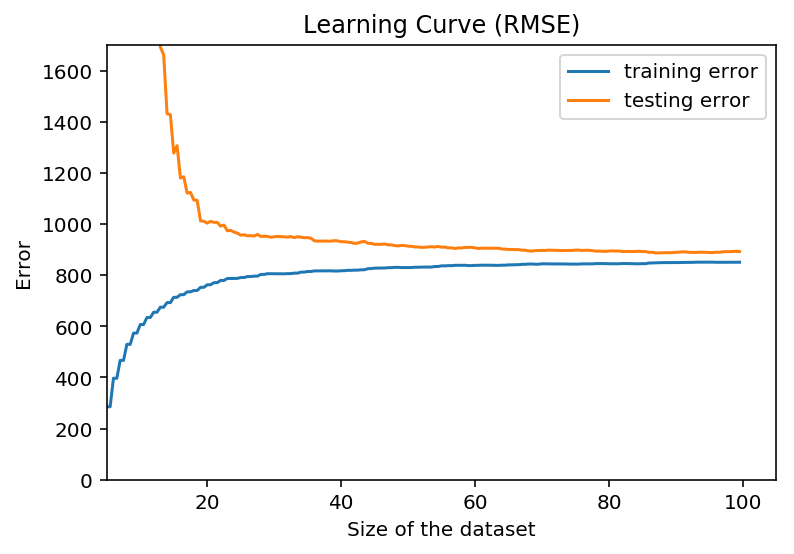

In [14]:
K = 200
testvals = np.zeros((N-10)*K).reshape(K,N-10)
trainvals = np.zeros((N-10)*K).reshape(K,N-10)

for k in range(K):
    shuff = np.random.permutation(N)
    X = X[shuff]
    y = y[shuff]
    for m in range(10,N):
        X_train = X[:int(m*0.5)]
        X_test = X[int(m*0.5):m]

        y_train = y[:int(m*0.5)]
        y_test = y[int(m*0.5):m]




        w = linear_fit(X_train,y_train)


        g_train = linear_predict(X_train,w)
        g_test = linear_predict(X_test,w)
        
        r_train = RMSE(g_train,y_train)
        r_test = RMSE(g_test,y_test)
        testvals[k,m-10] = r_test
        trainvals[k,m-10] = r_train
testy = np.mean(testvals,axis=0)
trainy = np.mean(trainvals,axis=0)
plt.plot(np.arange(10,N)/2,trainy,label="training error")
plt.plot(np.arange(10,N)/2,testy,label="testing error")
xmin = 5
xmax = N/2+5
ymin = 0
ymax = np.max(trainy)*2
plt.axis([xmin,xmax,ymin,ymax])
plt.xlabel("Size of the dataset")
plt.ylabel("Error")
plt.legend()
plt.title("Learning Curve (RMSE)")
plt.show()

### Part 10

1. What does the learning curve look like when the hypothesis class is too complex for the target function and the amount of data?

When the hypothesis class is too complex for the target function and the amount of data, the learning curve looks going up and down, like shown above when the curves depended on random choices.

2. What does the learning curve look like when the hypothesis class is too simple for the target function and the amount of data?

When the hypothesis class is too simple, the curves will show higher error because there might not be a hypothesis that fits the function and amount of data.

3. What does the learning curve look like if the complexity of the hypothesis class is appropriate to the problem?

If the complexity of the hypothesis class is appropriate to the problem, the curves will be smoother like above when K = 200.

4. Why does test error go down and train error go up?
When it tests it on actual data, the algorithm will change itself to fit the data making the training error go up. Eventually, the algorithm tries to get to its desired performance.

### Regression meets classification

In this final section we connect regression and classification.  

First we reproduce the linearly separable dataset that we used in HW 2.

Then we embed that data in 3D space by making the $z$-coordinate of each data point 1 for positive examples, and -1 for negative examples.

Finally we fit this 3D data with a plane using linear regression.  

All of this is shown in the plot way down below.

#### Part 11

How can this regression plane $z = a+bx+cy$ be used to help classify new data points?

This regression plane can be used to classify new data points by separating them by -1 or 1. This causes them to be a different color on the grid and helps us discern data points by color. It may also help us find out where the line to separate the data should be.


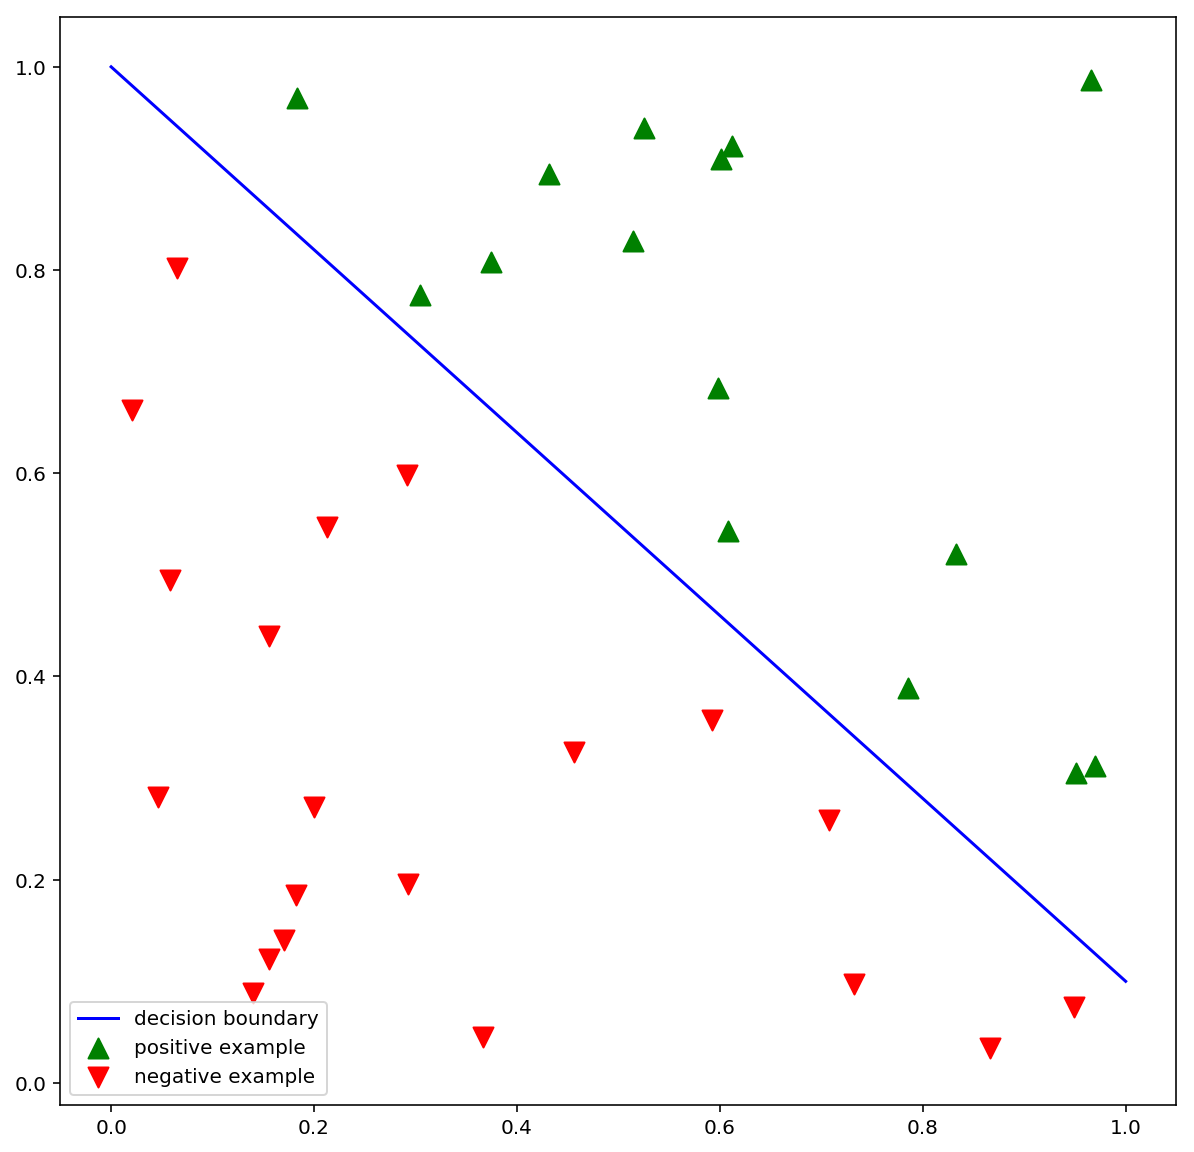

In [15]:
## Producing synthetic data
"""
In this cell we create 35 points at random.
We separate them with a line to create linearly separable data.
The data is stored in the points array.
Note that the first column of the points array is a "bias" column of all ones.
The "line _coef" (coefficients) variable works like this:
    if line_coef = (a,b,c)
    then this describes the line
    0 = a + bx + cy
This line can be thought of as the intersection of the plane
    z = a + bx + cy
with the xy plane.
Observe that in 
    0 = a + bx + cy
there are really only two degrees of freedom, because we can divide everything by c to get

    0 = A + Bx + y
where A = a/c and B = b/c.
(This assumes c != 0, but this assumption will almost always be true.)
"""

import numpy as np
import matplotlib.pyplot as plt

N = 35 # number of points
np.random.seed(42)  # So that everyone has the same "random" points
points = np.zeros(3*N).reshape(N,3)
points[:,1] = np.random.rand(N) #random x-coordinates
points[:,2] = np.random.rand(N) #random y-coordinates
points[:,0] = np.ones(N)        #bias column

line_coef = (-1,0.9,1)          #this line will define whether a point is a positive or negative example
pos = points.dot(line_coef) >= 0  # positive examples are above the line
neg = ~pos   # negative examples are below the line
"""
Question:  do you understand what pos and neg are, and how they work?
           you might want to print them out and experiment with them.
           we use them to select out certain rows of a numpy array.
           if this is confusing read the section here about 
           Boolean or "mask" index arrays:
           https://docs.scipy.org/doc/numpy-1.10.0/user/basics.indexing.html
"""


x = np.linspace(0,1)                # domain of decision boundary line
y = -line_coef[1]*x - line_coef[0]  # this is the decision boundary line

"""
A note about colors... I used "green" for "positive example" and "red" for "negative example".
If you happen to be red green colorblind (like 8% of all men) then please feel free to change the colors.
"""

plt.figure(1,figsize=(10,10))
plt.scatter(points[pos,1],points[pos,2],c='green',marker="^",s=100,label="positive example")  #plot positive examples
plt.scatter(points[neg,1],points[neg,2],c='red',marker="v",s=100,label="negative example")  #plot negative examples
plt.plot(x,y,'b',label="decision boundary")  #plot linear separator
plt.legend()
plt.show()

In [16]:
y = np.ones(N)
y[neg] = -1
y[pos] = 1
X = points

w = linear_fit(X,y)
X.shape
Pos =X[pos]
Neg = X[neg]

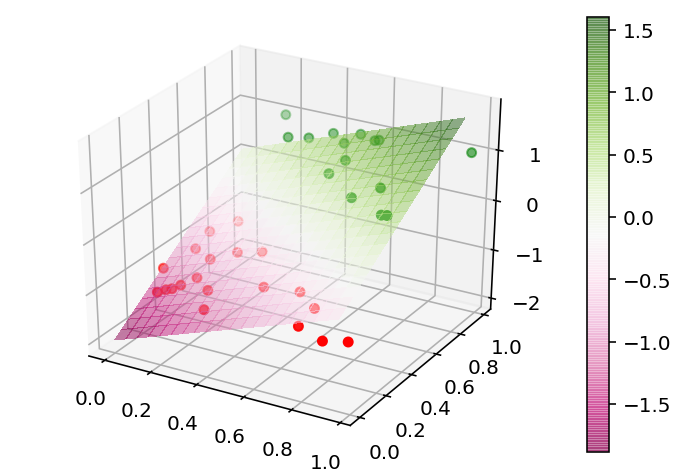

In [17]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
#ax = fig.gca(projection='3d')

ax = plt.axes(projection='3d')


# Make data.
XX = np.arange(0, 1, 0.05)
YY = np.arange(0, 1, 0.05)
XX, YY = np.meshgrid(XX, YY)

w = linear_fit(X,y)

Z = w[0]+w[1]*XX+w[2]*YY

surf = ax.plot_surface(XX, YY, Z, cmap=cm.PiYG,
                       linewidth=0, antialiased=False,alpha=0.5)
                       
                       
# Data for three-dimensional scattered points
zdata = np.ones(Pos.shape[0])
xdata = Pos[:,1]
ydata = Pos[:,2]
ax.scatter3D(xdata, ydata, zdata, c='green');

zdata = -1*np.ones(Neg.shape[0])
xdata = Neg[:,1]
ydata = Neg[:,2]
ax.scatter3D(xdata, ydata, zdata, c='red');
fig.colorbar(surf)
plt.show()